In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

In [2]:
time.sleep(80)

In [3]:
regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
# regions = [ 'us-west1-b']


instance_type = 'e2-small'

In [4]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'us-west1-b', 0, 4, 'FKE.pem', -1, 16,
# 21, 'us-west1-b', 0, 4, 'FKE.pem', -1, 17,
# 22, 'us-west1-b', 0, 4, 'FKE.pem', -1, 18,
# 23, 'us-west1-b', 0, 4, 'FKE.pem', -1, 19,
# 24, 'us-west1-b', 0, 5, 'FKE.pem', -1, 20,
# 25, 'us-west1-b', 0, 5, 'FKE.pem', -1, 21,
# 26, 'us-west1-b', 0, 5, 'FKE.pem', -1, 22,
# 27, 'us-west1-b', 0, 5, 'FKE.pem', -1, 23,
# 28, 'us-west1-b', 0, 6, 'FKE.pem', -1, 24,
# 29, 'us-west1-b', 0, 6, 'FKE.pem', -1, 25,
# 30, 'us-west1-b', 0, 6, 'FKE.pem', -1, 26,
# 31, 'us-west1-b', 0, 6, 'FKE.pem', -1, 27,
# 32, 'us-west1-b', 0, 7, 'FKE.pem', -1, 28,
# 33, 'us-west1-b', 0, 7, 'FKE.pem', -1, 29,
# 34, 'us-west1-b', 0, 7, 'FKE.pem', -1, 30,
# 35, 'us-west1-b', 0, 7, 'FKE.pem', -1, 31,
# 36, 'us-west1-b', 1, -1, 'FKE.pem', 4, -1,
# 37, 'us-west1-b', 1, -1, 'FKE.pem', 5, -1,
# 38, 'us-west1-b', 1, -1, 'FKE.pem', 6, -1,
# 39, 'us-west1-b', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west1-b', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west1-b', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west1-b', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west1-b', 1, -1, 'FKU2.pem', 11, -1,

In [5]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 16,
# 21, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 17,
# 22, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 18,
# 23, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 19,
# 24, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 20,
# 25, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 21,
# 26, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 22,
# 27, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 23,
# 28, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 24,
# 29, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 25,
# 30, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 26,
# 31, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 27,
# 32, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 28,
# 33, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 29,
# 34, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 30,
# 35, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 31,
# 36, 'europe-west3-c', 1, -1, 'FKE.pem', 4, -1,
# 37, 'europe-west3-c', 1, -1, 'FKE.pem', 5, -1,
# 38, 'europe-west3-c', 1, -1, 'FKE.pem', 6, -1,
# 39, 'europe-west3-c', 1, -1, 'FKE.pem', 7, -1,
# 40, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'asia-south1-c', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'asia-south1-c', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'asia-south1-c', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'asia-south1-c', 1, -1, 'FKU2.pem', 11, -1,

In [6]:
# 2 clusters

In [7]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0,'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0,'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0,'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0,'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 25, 'asia-south1-c', 0, 1,'FKA.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1,'FKA.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1,'FKA.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1,'FKA.pem', -1, 27,
# 29, 'asia-south1-c', 0, 1,'FKA.pem', -1, 28,
# 30, 'asia-south1-c', 0, 1,'FKA.pem', -1, 29,
# 31, 'asia-south1-c', 0, 1,'FKA.pem', -1, 30,
# 32, 'asia-south1-c', 0, 1,'FKA.pem', -1, 31,
# 33, 'asia-south1-c', 0, 1,'FKA.pem', -1, 32,
# 34, 'asia-south1-c', 0, 1,'FKA.pem', -1, 33,
# 35, 'asia-south1-c', 0, 1,'FKA.pem', -1, 34,
# 36, 'asia-south1-c', 0, 1,'FKA.pem', -1, 35,
# 37, 'asia-south1-c', 0, 1,'FKA.pem', -1, 36,
# 38, 'asia-south1-c', 0, 1,'FKA.pem', -1, 37,
# 39, 'asia-south1-c', 0, 1,'FKA.pem', -1, 38,
# 40, 'asia-south1-c', 0, 1,'FKA.pem', -1, 39,
# 41, 'asia-south1-c', 0, 1,'FKA.pem', -1, 40,
# 42, 'asia-south1-c', 0, 1,'FKA.pem', -1, 41,
# 43, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 42,
# 44, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 43,
# 45, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 44,
# 46, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 45,
# 47, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 46,
# 48, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 47,
# 49, 'asia-south1-c', 1, -1, 'FKA.pem', 1, -1,


In [8]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 0, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 0, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 0, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 0, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 0,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 0,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 0,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 0,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 25, 'us-west1-b', 0, 1,'FKA.pem', -1, 24,
# 26, 'us-west1-b', 0, 1,'FKA.pem', -1, 25,
# 27, 'us-west1-b', 0, 1,'FKA.pem', -1, 26,
# 28, 'us-west1-b', 0, 1,'FKA.pem', -1, 27,
# 29, 'us-west1-b', 0, 1,'FKA.pem', -1, 28,
# 30, 'us-west1-b', 0, 1,'FKA.pem', -1, 29,
# 31, 'us-west1-b', 0, 1,'FKA.pem', -1, 30,
# 32, 'us-west1-b', 0, 1,'FKA.pem', -1, 31,
# 33, 'us-west1-b', 0, 1,'FKA.pem', -1, 32,
# 34, 'us-west1-b', 0, 1,'FKA.pem', -1, 33,
# 35, 'us-west1-b', 0, 1,'FKA.pem', -1, 34,
# 36, 'us-west1-b', 0, 1,'FKA.pem', -1, 35,
# 37, 'us-west1-b', 0, 1,'FKA.pem', -1, 36,
# 38, 'us-west1-b', 0, 1,'FKA.pem', -1, 37,
# 39, 'us-west1-b', 0, 1,'FKA.pem', -1, 38,
# 40, 'us-west1-b', 0, 1,'FKA.pem', -1, 39,
# 41, 'us-west1-b', 0, 1,'FKA.pem', -1, 40,
# 42, 'us-west1-b', 0, 1,'FKA.pem', -1, 41,
# 43, 'us-west1-b', 0, 1, 'FKA.pem', -1, 42,
# 44, 'us-west1-b', 0, 1, 'FKA.pem', -1, 43,
# 45, 'us-west1-b', 0, 1, 'FKA.pem', -1, 44,
# 46, 'us-west1-b', 0, 1, 'FKA.pem', -1, 45,
# 47, 'us-west1-b', 0, 1, 'FKA.pem', -1, 46,
# 48, 'us-west1-b', 0, 1, 'FKA.pem', -1, 47,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,


In [9]:
# 3 clusters

In [10]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 16,
# 18, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 17,
# 19, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 18,
# 20, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 19,
# 21, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 20,
# 22, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 21,
# 23, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 22,
# 24, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 23,
# 25, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 27,
# 29, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 28,
# 30, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 29,
# 31, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 30,
# 32, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 31,
# 33, 'europe-west3-c', 1, -1, 'FKE.pem', 1, -1,
# 34, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 32,
# 35, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 33,
# 36, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 34,
# 37, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 35,
# 38, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 47,
# 50, 'asia-south1-c', 1, -1, 'FKU2.pem', 2, -1,

In [11]:
# 3 cluster test non-geo

In [12]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 5, 'us-west1-b', 0, 1, 'FKE.pem', -1, 4,
# 6, 'us-west1-b', 0, 1, 'FKE.pem', -1, 5,
# 7, 'us-west1-b', 0, 1, 'FKE.pem', -1, 6,
# 8, 'us-west1-b', 0, 1, 'FKE.pem', -1, 7,
# 9, 'us-west1-b', 1, -1, 'FKE.pem', 1, -1,
# 10, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 8,
# 11, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 9,
# 12, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 10,
# 13, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 11,
# 14, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,

In [13]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKU2.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKU2.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKU2.pem', 3, -1,

In [14]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 4, 'FKE.pem', -1, 16,
# 17, 'us-west1-b', 0, 4, 'FKE.pem', -1, 17,
# 18, 'us-west1-b', 0, 4, 'FKE.pem', -1, 18,
# 19, 'us-west1-b', 0, 4, 'FKE.pem', -1, 19,
# 20, 'us-west1-b', 0, 5, 'FKE.pem', -1, 20,
# 21, 'us-west1-b', 0, 5, 'FKE.pem', -1, 21,
# 22, 'us-west1-b', 0, 5, 'FKE.pem', -1, 22,
# 23, 'us-west1-b', 0, 5, 'FKE.pem', -1, 23,
# 24, 'us-west1-b', 0, 6, 'FKE.pem', -1, 24,
# 25, 'us-west1-b', 0, 6, 'FKE.pem', -1, 25,
# 26, 'us-west1-b', 0, 6, 'FKE.pem', -1, 26,
# 27, 'us-west1-b', 0, 6, 'FKE.pem', -1, 27,
# 28, 'us-west1-b', 0, 7, 'FKE.pem', -1, 28,
# 29, 'us-west1-b', 0, 7, 'FKE.pem', -1, 29,
# 30, 'us-west1-b', 0, 7, 'FKE.pem', -1, 30,
# 31, 'us-west1-b', 0, 7, 'FKE.pem', -1, 31,
# 32, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 32,
# 33, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 33,
# 34, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 34,
# 35, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 35,
# 36, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 36,
# 37, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 37,
# 38, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 38,
# 39, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 39,
# 40, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 40,
# 41, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 41,
# 42, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 42,
# 43, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 43,
# 44, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 44,
# 45, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 45,
# 46, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 46,
# 47, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 47,
# 48, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 50, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 51, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 52, 'us-west1-b', 1, -1, 'FKE.pem', 4, -1,
# 53, 'us-west1-b', 1, -1, 'FKE.pem', 5, -1,
# 54, 'us-west1-b', 1, -1, 'FKE.pem', 6, -1,
# 55, 'us-west1-b', 1, -1, 'FKE.pem', 7, -1,
# 56, 'us-west1-b', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west1-b', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west1-b', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west1-b', 1, -1, 'FKU2.pem', 11, -1,

In [15]:
# 2 clusters

In [16]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,

# 4, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,

# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,


# 49, 'asia-south1-c', 1, -1, 'FKU2.pem', 1, -1,

In [17]:
# 6 clusters

In [18]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 1, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 1, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 1, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 1, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 16,
# 19, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 17,
# 20, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 18,
# 21, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 19,
# 22, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 20,
# 23, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 21,
# 24, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 22,
# 25, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 23,
# 26, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 24,
# 27, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 25,
# 28, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 26,
# 29, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 27,
# 30, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 28,
# 31, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 29,
# 32, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 30,
# 33, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 31,
# 34, 'europe-west3-c', 1, -1, 'FKE.pem', 2, -1,
# 35, 'europe-west3-c', 1, -1, 'FKE.pem', 3, -1,
# 36, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 32,
# 37, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 33,
# 38, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 34,
# 39, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 35,
# 40, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 36,
# 41, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 37,
# 42, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 38,
# 43, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 39,
# 44, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 40,
# 45, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 41,
# 46, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 42,
# 47, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 43,
# 48, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 44,
# 49, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 45,
# 50, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 46,
# 51, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 47,
# 52, 'asia-south1-c', 1, -1, 'FKU2.pem', 4, -1,
# 53, 'asia-south1-c', 1, -1, 'FKU2.pem', 5, -1,

In [ ]:
# 8 clusters

In [ ]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 2, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 2, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 2, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 2, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 2, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 2, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 3, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 3, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 3,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 3,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 3,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 3,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 0, 4,'FKA.pem', -1, 24,
# 25, 'us-west1-b', 0, 4,'FKA.pem', -1, 25,
# 26, 'us-west1-b', 0, 4,'FKA.pem', -1, 26,
# 27, 'us-west1-b', 0, 4,'FKA.pem', -1, 27,
# 28, 'us-west1-b', 0, 4,'FKA.pem', -1, 28,
# 29, 'us-west1-b', 0, 4,'FKA.pem', -1, 29,
# 30, 'us-west1-b', 0, 5,'FKA.pem', -1, 30,
# 31, 'us-west1-b', 0, 5,'FKA.pem', -1, 31,
# 32, 'us-west1-b', 0, 5,'FKA.pem', -1, 32,
# 33, 'us-west1-b', 0, 5,'FKA.pem', -1, 33,
# 34, 'us-west1-b', 0, 5,'FKA.pem', -1, 34,
# 35, 'us-west1-b', 0, 5,'FKA.pem', -1, 35,
# 36, 'us-west1-b', 0, 6,'FKA.pem', -1, 36,
# 37, 'us-west1-b', 0, 6,'FKA.pem', -1, 37,
# 38, 'us-west1-b', 0, 6,'FKA.pem', -1, 38,
# 39, 'us-west1-b', 0, 6,'FKA.pem', -1, 39,
# 40, 'us-west1-b', 0, 6,'FKA.pem', -1, 40,
# 41, 'us-west1-b', 0, 6,'FKA.pem', -1, 41,
# 42, 'us-west1-b', 0, 7, 'FKA.pem', -1, 42,
# 43, 'us-west1-b', 0, 7, 'FKA.pem', -1, 43,
# 44, 'us-west1-b', 0, 7, 'FKA.pem', -1, 44,
# 45, 'us-west1-b', 0, 7, 'FKA.pem', -1, 45,
# 46, 'us-west1-b', 0, 7, 'FKA.pem', -1, 46,
# 47, 'us-west1-b', 0, 7, 'FKA.pem', -1, 47,
# 48, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 50, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 51, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 52, 'us-west1-b', 1, -1, 'FKA.pem', 4, -1,
# 53, 'us-west1-b', 1, -1, 'FKA.pem', 5, -1,
# 54, 'us-west1-b', 1, -1, 'FKA.pem', 6, -1,
# 55, 'us-west1-b', 1, -1, 'FKA.pem', 7, -1,

In [19]:
df =pd.read_csv('node_info.csv')

node_info_dict = df.to_dict()

node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [20]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [21]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [22]:
data2, len(data2)

(['10.138.0.119',
  '10.138.0.48',
  '10.138.0.44',
  '10.138.0.3',
  '10.138.0.23',
  '10.138.0.17',
  '10.138.0.28',
  '10.138.0.36',
  '10.138.0.59',
  '10.138.0.2',
  '10.138.15.222',
  '10.138.0.37',
  '10.138.0.14',
  '10.138.0.42',
  '10.138.0.11',
  '10.138.0.51',
  '10.138.0.19',
  '10.138.0.15',
  '10.138.0.60',
  '10.138.0.46',
  '10.138.0.27',
  '10.138.15.201',
  '10.138.0.127',
  '10.138.15.212',
  '10.138.0.104',
  '10.138.0.70',
  '10.138.0.123',
  '10.138.0.35',
  '10.138.0.34',
  '10.138.0.55',
  '10.138.15.200',
  '10.138.0.63',
  '10.138.15.208',
  '10.138.15.198',
  '10.138.15.204',
  '10.138.15.218',
  '10.138.0.40',
  '10.138.15.205',
  '10.138.15.219',
  '10.138.15.221',
  '10.138.0.112',
  '10.138.15.210',
  '10.138.15.195',
  '10.138.0.116',
  '10.138.0.62',
  '10.138.0.72',
  '10.138.15.194',
  '10.138.0.109',
  '10.138.0.108',
  '10.138.0.25',
  '10.138.15.192',
  '10.138.0.114',
  '10.138.0.67',
  '10.138.0.65',
  '10.138.0.107',
  '10.138.0.121',
  '10.138

In [23]:
data = []

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])

In [24]:
data, len(data)

(['10.138.0.119    10.138.0.119',
  '10.138.0.48    10.138.0.48',
  '10.138.0.44    10.138.0.44',
  '10.138.0.3    10.138.0.3',
  '10.138.0.23    10.138.0.23',
  '10.138.0.17    10.138.0.17',
  '10.138.0.28    10.138.0.28',
  '10.138.0.36    10.138.0.36',
  '10.138.0.59    10.138.0.59',
  '10.138.0.2    10.138.0.2',
  '10.138.15.222    10.138.15.222',
  '10.138.0.37    10.138.0.37',
  '10.138.0.14    10.138.0.14',
  '10.138.0.42    10.138.0.42',
  '10.138.0.11    10.138.0.11',
  '10.138.0.51    10.138.0.51',
  '10.138.0.19    10.138.0.19',
  '10.138.0.15    10.138.0.15',
  '10.138.0.60    10.138.0.60',
  '10.138.0.46    10.138.0.46',
  '10.138.0.27    10.138.0.27',
  '10.138.15.201    10.138.15.201',
  '10.138.0.127    10.138.0.127',
  '10.138.15.212    10.138.15.212',
  '10.138.0.104    10.138.0.104',
  '10.138.0.70    10.138.0.70',
  '10.138.0.123    10.138.0.123',
  '10.138.0.35    10.138.0.35',
  '10.138.0.34    10.138.0.34',
  '10.138.0.55    10.138.0.55',
  '10.138.15.200    10.1

In [25]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [26]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [27]:
# time.sleep(60)

In [28]:
total_count = 0

for key in node_info_dict['ServerOrClientregion'].keys():
    if node_info_dict['ServerOrClientregion'][key] ==0:
        total_count = total_count + 1
        
total_count

48

In [29]:




def getTimeThps(file, flag):
    
    f = open(file, "r")
    data = f.readlines() 

    times = []
    thputs = []
    for line in data:
        if 'throughput[ops/s]' in line:
            lineData = (line[13+line.find('max[ops/s])>'):-2])
            print(lineData)

            times.append(lineData.split('|')[0])
            thputs.append(lineData.split('|')[-2])
    if (flag): 
        times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
        thputs.append(0)
        
    return np.array(times).astype(float), np.array(thputs).astype(float) 

In [30]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines, len(lines)

(['10.138.0.119',
  '10.138.0.48',
  '10.138.0.44',
  '10.138.0.3',
  '10.138.0.23',
  '10.138.0.17',
  '10.138.0.28',
  '10.138.0.36',
  '10.138.0.59',
  '10.138.0.2',
  '10.138.15.222',
  '10.138.0.37',
  '10.138.0.14',
  '10.138.0.42',
  '10.138.0.11',
  '10.138.0.51',
  '10.138.0.19',
  '10.138.0.15',
  '10.138.0.60',
  '10.138.0.46',
  '10.138.0.27',
  '10.138.15.201',
  '10.138.0.127',
  '10.138.15.212',
  '10.138.0.104',
  '10.138.0.70',
  '10.138.0.123',
  '10.138.0.35',
  '10.138.0.34',
  '10.138.0.55',
  '10.138.15.200',
  '10.138.0.63',
  '10.138.15.208',
  '10.138.15.198',
  '10.138.15.204',
  '10.138.15.218',
  '10.138.0.40',
  '10.138.15.205',
  '10.138.15.219',
  '10.138.15.221',
  '10.138.0.112',
  '10.138.15.210',
  '10.138.15.195',
  '10.138.0.116',
  '10.138.0.62',
  '10.138.0.72',
  '10.138.15.194',
  '10.138.0.109',
  '10.138.0.108',
  '10.138.0.25',
  '10.138.15.192',
  '10.138.0.114',
  '10.138.0.67',
  '10.138.0.65',
  '10.138.0.107',
  '10.138.0.121',
  '10.138

In [31]:
for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-119.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-48.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-44.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-3.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-23.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-17.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-28.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-36.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-59.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-2.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-15-222.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-37.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-14.us-west-1.compute

In [32]:
## Set number of clusters

nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)





nreplicas = int(total_count/nclusters)
nclients = nclusters


nodeIps = []
clientIps = []

for i in range(total_count + nclients):
    if node_info_dict['ServerOrClientregion'][i] ==0:
        nodeIps.append(lines[i])
    else:
        clientIps.append(lines[i])


# nodeIps = lines[:nclusters* nreplicas]


# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]



# clientIps = lines[-(nclusters):]



# clientIps = lines[-nclients:]



clientIps, no_cluster_yet_nodes

12


(['10.138.0.108',
  '10.138.0.25',
  '10.138.15.192',
  '10.138.0.114',
  '10.138.0.67',
  '10.138.0.65',
  '10.138.0.107',
  '10.138.0.121',
  '10.138.0.118',
  '10.138.0.120',
  '10.138.15.223',
  '10.138.15.224'],
 [])

In [33]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [34]:
node_info_dict['region'][0].strip()

"'us-west1-b'"

In [35]:
## Functions

def setup(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'
        
        print(command)
        os.system(command)
        
def initialize(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'
        
        
        os.system(command)
        
        
def git_clone(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'
        
        
        os.system(command)
        
def git_pull(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'
        
        
        os.system(command)
        
def compile_job(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm config/currentView; '
    for iter_ in range(nclusters):
        rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'
        
        
        os.system(command)
        
        
def clean_all(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'

        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'
        
        
        os.system(command)
        

        
        
        
#     if ip!='None' and( ip in no_cluster_yet_nodes):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
#         os.system(command)        
# #         print(command)

def check_node(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'
        
        
        os.system(command)
#         print(command)


def run_basic_client(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
                
            
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'

        
        os.system(command)


def kill_java(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup"'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'

        
        print(command)

In [36]:
## First Time Setup

lines, len(lines)

(['10.138.0.119',
  '10.138.0.48',
  '10.138.0.44',
  '10.138.0.3',
  '10.138.0.23',
  '10.138.0.17',
  '10.138.0.28',
  '10.138.0.36',
  '10.138.0.59',
  '10.138.0.2',
  '10.138.15.222',
  '10.138.0.37',
  '10.138.0.14',
  '10.138.0.42',
  '10.138.0.11',
  '10.138.0.51',
  '10.138.0.19',
  '10.138.0.15',
  '10.138.0.60',
  '10.138.0.46',
  '10.138.0.27',
  '10.138.15.201',
  '10.138.0.127',
  '10.138.15.212',
  '10.138.0.104',
  '10.138.0.70',
  '10.138.0.123',
  '10.138.0.35',
  '10.138.0.34',
  '10.138.0.55',
  '10.138.15.200',
  '10.138.0.63',
  '10.138.15.208',
  '10.138.15.198',
  '10.138.15.204',
  '10.138.15.218',
  '10.138.0.40',
  '10.138.15.205',
  '10.138.15.219',
  '10.138.15.221',
  '10.138.0.112',
  '10.138.15.210',
  '10.138.15.195',
  '10.138.0.116',
  '10.138.0.62',
  '10.138.0.72',
  '10.138.15.194',
  '10.138.0.109',
  '10.138.0.108',
  '10.138.0.25',
  '10.138.15.192',
  '10.138.0.114',
  '10.138.0.67',
  '10.138.0.65',
  '10.138.0.107',
  '10.138.0.121',
  '10.138

In [37]:
# for i in range(10):
#     setup(i)


results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [38]:
results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
print(results)  

Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRel



Building dependency tree...Reading package lists...
Reading package lists...Building dependency tree...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...



Reading state information...


Reading state information...

Reading state information...


Reading state information...
Reading package lists...

Building dependency tree...


Reading package lists...

Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Building dependency tree...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 li

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxco

Building dependency tree...

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Building dependency tree...
Reading state information...
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Building dependency tree...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...
Reading state information...

Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswi

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.

Building dependency tree...
Reading state information...
Reading package lists...Reading package lists...0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.

Reading package lists...Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-j

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1

  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Fetched 396 kB in 0s (14.8 MB/s)

Reading state information...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4atabase ... 90%
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
The following packages will be upgraded:
Reading package lists...  curl libcurl4


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Reading package lists...Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
Setting up curl (7.68.0-1ubuntu2.20) ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Processing triggers for man-db (2.9.1-1) ...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Fetched 396 kB in 0s (13.8 MB/s)
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...

Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Fetched 396 kB in 0s (14.0 MB/s)
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
Fetched 396 kB in 0s (13.8 MB/s)
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
(Reading database ... 71134 files and directories currently installed.)Processing triggers for man-db (2.9.1-1) ...

Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autorem

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  li



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
Reading package lists...
Building dependency tree...Reading package lists...The following packages will be upgraded:
  curl libcurl4

Building dependency tree...2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Reading package lists...Reading package lists...
Reading state information...


Building dependency tree...Fetched 396 kB in 0s (11.2 MB/s)
Building dependency tree...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
The following packages will be upgraded:
  curl libcurl4
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Reading state information...
Fetched 396 kB in 0s (16.2 MB/s)
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-f



job.sh: 12: sdk: not found



Building dependency tree...Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
Reading package lists...Processing triggers for man-db (2.9.1-1) ...
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0

  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shap

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found



Reading state information...

0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Building dependency tree...Reading package lists...
Reading state information...
Reading package lists...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Building dependency tree...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/` 


                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
  

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Fetched 396 kB in 0s (14.3 MB/s)
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Get:1

job.sh: 12: sdk: not found


The following packages will be upgraded:
  curl libcurl4
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 19 newly installed, 0 to remove and 43 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-commo

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following packages will be upgraded:
  curl libcurl4se ... 
2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]

Reading state information...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


The following NEW packages will be installed:
  ant ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Reading package lists...Fetched 43.0 MB in 1s (47.4 MB/s)
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 li

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libharfbuzz0b amd64 2.6.4-1ubuntu4.2 [391 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libpcsclite1 amd64 1.8.26-3 [22.0 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 openjdk-11-jre-headless amd64 11.0.20.1+1-0ubuntu1~20.04 [38.2 MB]
Selecting previously unselected package libavahi-common3:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Reading package lists...Pr

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Reading package lists...
Building dependency tree...Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/` 

dpkg-preconfigure: unable to re-open stdin: 



Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Building dependency tree...Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Fetched 43.0 MB in 2s (26.3 MB/s)
Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
(Reading database ... 75%
Reading state information...
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
(Reading database ... 71134 files and directories currently installed.)Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package java-common.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-

Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


           /moyso+//+ossso:.           .yy`          `dy+:`         ..       :MMMN+---/oys:
         /+m:  `.-:::-`               /d+                                    +MMMMMMMNh:`
        +MN/                        -yh.                                     `+hddhy+.
       /MM+                       .sh:
      :NMo                      -sh/
     -NMs                    `/yy:
    .NMy                  `:sh+.
   `mMm`               ./yds-
  `dMMMmyo:-.````.-:oymNy:`
  +NMMMMMMMMMMMMMMMMms:`
    -+shmNMMMNmdy+:`


                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Selecting previously unselected package 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 43.0 MB in 2s (22.2 MB/s)
Selecting previously unselected package libcups2:amd64.
Reading package lists...Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package ca-certificates-java.
(Reading database ... 60%
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Fetched 43.0 MB in 2s (21.5 MB/s)
Selecting previously unselected package liblcms2-2:amd64.

Reading state information...
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package java-common.
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libjpeg-turbo8:

Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Selecting previously unselected package fonts-dejavu-core.
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Unpacking fonts-dejavu-core (2.37-1) ...
Selecting previously unselected package libjpeg8:amd64.
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpe

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Reading package lists...Reading package lists...
Selecting previously unselected package fontconfig-config.
Building dependency tree...Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...

Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Building dependency tree...Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Selecting previously unselected package libgraphite2-3:amd64.
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...

                                -+syyyyyyys:
                            `/yho:`       -yd.
          

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 



Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Selecting previously unselected package java-common.
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Unpacking java-common (0.72) ...

Reading state information...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Selecting previously unselected package libavahi-common-data:amd64.
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils

  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
0 upgraded, 19 newly installed, 0 to remove and 43 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-upda

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Fetched 43.0 MB in 4s (11.5 MB/s)
Selecting previously unselected package fontconfig-config.
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Fetched 43.0 MB in 4s (11.9 MB/s)
Selecting previously unselected package java-common.
Fetched 43.0 MB in 2s (27.5 MB/s)
Preparing to unpack .../01-java-common_0.72_all.deb ...
(Reading database ... Unpacking java-common (0.72) ...
71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...Selecting previously unselected package openjdk-11-jre-headless:amd64.

Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libpcsclite1:amd64.
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Selecting previously unselected packa

Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Selecting previously unselected package fontconfig-config.
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Selecting previously unselected package fonts-dejavu-core.
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
Unpacking fonts-dejavu-core (2.37-1) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package ca-certificates-java.
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Fetched 43.0 MB in 2s (23.6 MB/s)
Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...(Reading database ... 65%
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Unpacking java-common (0.72) ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.de

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Fetched 43.0 MB in 5s (9399 kB/s)
Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package libjpeg8:amd64.
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
(Reading database ... 71134 files and directories currently installed.)
Fetched 43.0 MB in 1s (40.9 MB/s)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Unpacking ca-certificates-java (

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Selecting previously unselected package java-common.
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Fetched 43.0 MB in 5s (9476 kB/s)
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
Fetched 43.0 MB in 3s (13.1 MB/s)
Selecting previously unselected package fontconfig-config.
Selecting previously unselected package libavahi-common-data:amd64.
Selecting pr

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libjpeg-turbo8:amd64.
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package libcups2:amd64.
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Selecting previously unselected package libcups2:amd64.
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Fetched 43.0 MB in 3s (16.5 MB/s)
Selecting previously unselected package libjpeg8:amd64.
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Sel

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/unpack200 to provide /usr/bin/unpack200 (unpack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Selecting previously unselected package fontconfig-config.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Selecting previously unselected package default-jre-headless.
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72) ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfo

Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:certSIGN_ROOT_CA.pem
Adding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:D-TRUST_BR_Root_CA_1_2020.pem
Selecting previously unselected package default-jre-headless.
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pem
Adding debian:CA_Disig_Root_R2.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Adding debian:Trustwave_Global_ECC_P384_Certification_Authority.pem
Unpacking default-jre-headless (2:1.11-72) ...
Adding debian:Certum_Trusted_Root_CA.pem
Adding debian:DigiCert_TLS_ECC_P384_Root_G5.pem
Adding debian:Baltimore_CyberTrust_Root.pem
Adding debian:certSIGN_Root_CA_G2.pem
Adding debian:AffirmTrust_Commercial.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem
Adding debian:em

Adding debian:AffirmTrust_Premium_ECC.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Adding debian:Security_Communication_RootCA3.pem

Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:GLOBALTRUST_2020.pem
Adding debian:GlobalSign_Root_E46.pem
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Secure_Global_CA.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Selecting previously unselected package default-jre-headless.
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /us

Adding debian:AffirmTrust_Premium_ECC.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72) ...
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:Security_Communication_RootCA3.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Setting up liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package default-jre-headless.
Adding debian:GLOBALTRUST_2020.pemSetting up java-common (0.72) ...

Selecting previously unselected package ant.
Adding debian:GlobalSign_Root_E46.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Adding debian:DigiCert_Global_Root_G2.pem
Unpacking default-jre-headless (2:1.11-72) ...
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Adding debian:TWCA_Root_Certification_Authority.pem
Unpacking ant (1.10.7-1) ...
Adding debian:Secure_Global_CA.pem


Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
Selecting previously unselected package ant.
Adding debian:Telia_Root_CA_v2.pem
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:QuoVadis_Root_CA_3.pem
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pemUnpacking ant (1.10.7-1) ...

Adding debian:COMODO_ECC_Certification_Authority.pem
Setting up default-jre-headless (2:1.11-72) ...
Setting up liblcms2-2:amd64 (2.9-4) ...
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:COMODO_Certification_Authority.pem
Adding debian:SecureTrust_CA.pem
done.
Setting up java-common (0.72) ...
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:Entrust_Root_Certification_Authority_-_

Adding debian:emSign_ECC_Root_CA_-_C3.pem
Adding debian:GTS_Root_R3.pem
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
Adding debian:SZAFIR_ROOT_CA2.pemAdding debian:ACCVRAIZ1.pem
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Setting up liblcms2-2:amd64 (2.9-4) ...

Adding debian:IdenTrust_Commercial_Root_CA_1.pemAdding debian:vTrus_Root_CA.pem
Setting up libpcsclite1:amd64 (1.8.26-3) ...

Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:SwissSign_Silver_CA_-_G2.pem
Setting up java-common (0.72) ...
Adding debian:XRamp_Global_CA_Root.pem
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pemSetting up default-jre-headless (2:1.11-72) ...

Setting up libharfbuzz0b:amd64 (2.6.4

Adding debian:Go_Daddy_Class_2_CA.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
Adding debian:Certum_Trusted_Network_CA.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:QuoVadis_Root_CA_2_G3.pem
Adding debian:DigiCert_Global_Root_CA.pem
Adding debian:T-TeleSec_GlobalRoot_Class_2.pem
Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:UCA_Global_G2_Root.pem
Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
Adding debian:emSign_Root_CA_-_G1.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem
Adding debian:HiPKI_Root_CA_-_G1.pem
Selecting previously unselected package default-jre-headless.
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Adding debian:DigiCert_Assured_ID_Root_G2.pem
Unpacking default-jre-headless (2:1.11-72) ...
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:TWCA_Global_Root_CA.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding

Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Setting up fonts-dejavu-core (2.37-1) ...
Adding debian:AffirmTrust_Premium.pem
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:TunTrust_Root_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
done.
Adding debian:QuoVadis_Root_CA_3.pemdone.
Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem

Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pemProcessing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package default-jre-headless.Adding debian:ANF_Secure_Server_Root_CA.pem


Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian


Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:UCA_Global_G2_Root.pem
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
Adding debian:GLOBALTRUST_2020.pem
Adding debian:emSign_Root_CA_-_G1.pemAdding debian:QuoVadis_Root_CA_3.pem

Setting up fontconfig-config (2.13.1-2ubuntu3) ...
Adding debian:Security_Communication_RootCA2.pem
Reading state information...Adding debian:GlobalSign_Root_E46.pem

Adding debian:DigiCert_Global_Root_G2.pemAdding debian:ACCVRAIZ1.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem

Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem

Adding debian:HiPKI_Root_CA_-_G1.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:vTrus_Root_CA.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:DigiCert_Assured_ID_Root_G2.pemAdd

Adding debian:Amazon_Root_CA_3.pemAdding debian:Certigna_Root_CA.pem

Adding debian:emSign_ECC_Root_CA_-_C3.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Adding debian:GTS_Root_R3.pemAdding debian:IdenTrust_Public_Sector_Root_CA_1.pem

Unpacking ant (1.10.7-1) ...
Adding debian:Telia_Root_CA_v2.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pemAdding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:GLOBALTRUST_2020.pemSetting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:ACCVRAIZ1.pem

Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:vTrus_Root_CA.pem
Adding debian:emSign_Root_CA_-_C1.pem
Set

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:TWCA_Global_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:Hongkong_Post_Root_CA_3.pemAdding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:certSIGN_ROOT_CA.pemAdding debian:DigiCert_High_Assurance_EV_Root_CA.pem

Adding debian:COMODO_RSA_Certification_Authority.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...

Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:D-TRUST_BR_Root_CA_1_2020.pemUnpacking default-jre-headless (2:1.11-72) ...
Adding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pem

Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pemdone.

done.
Adding debian:Comodo_AAA_Services_root.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:SSL.com_Root_Certification_Authorit

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Updating certificates in /etc/ssl/certs...
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pemAdding debian:XRamp_Global_CA_Root.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem

Adding debian:vTrus_ECC_Root_CA.pemAdding debian:DigiCert_TLS_RSA4096_Root_G5.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode

Adding debian:vTrus_ECC_Root_CA.pemAdding debian:Trustwave_Global_Certification_Authority.pem

Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
Adding debian:QuoVadis_Root_CA_3_G3.pem
Setting up liblcms2-2:amd64 (2.9-4) ...
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:certSIGN_ROOT_CA.p

Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Adding debian:Telia_Root_CA_v2.pem
Setting up fontconfig-config (2.13.1-2ubuntu3) ...
Setting up default-jre-headless (2:1.11-72) ...
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Setting up openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:SecureTrust_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Security_Communication_RootCA3.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:GLOBALTRUST_2020.pem
Adding debian:GlobalSign_Root_E46.pem

Reading state information...
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Starfield_Class_2

Adding debian:UCA_Global_G2_Root.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:SSL.com_Root_Certification_Authority_RSA.pem
Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:emSign_Root_CA_-_G1.pem
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Adding debian:GTS_Root_R2.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pemAdding debian:Certainly_Root_R1.pem

Adding debian:GTS_Root_R4.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:HiPKI_Root_CA_-_G1.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pemiputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically inst

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:GLOBALTRUST_2020.pem
Adding debian:GlobalSign_Root_E46.pem
Adding debian:Amazon_Root_CA_4.pem
Processing triggers for man-db (2.9.1-1) ...
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:Certigna.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Secure_Global_CA.pem
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Adding debian:GlobalSign_Root_R46.pem
Adding debian:USERTrust_ECC_Certification_Authority.pemAdding debian:Amazon_Root_CA_4.pem
Adding debian:Certigna.pem
Adding debian:GlobalSign_Root_R46.pem

Adding debian:Security_Communication_ECC_RootCA1.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:USERTrust_ECC_Certification_Authority.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
done.
done.
Adding debian:Security_Communication_ECC_Root

Adding debian:SecureSign_RootCA11.pem
Adding debian:COMODO_Certification_Authority.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:Starfield_Services_Root_Certificate_Authority_-_G2.pem
Adding debian:ISRG_Root_X1.pemAdding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem

Adding debian:AffirmTrust_Premium.pem
Adding debian:E-Tugra_Certification_Authority.pem
done.
done.
Adding debian:TunTrust_Root_CA.pem
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:Atos_TrustedRoot_2011.pem
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Adding debian:E-Tugra_Global_Root_CA_ECC_v3.pem
Adding debian:Buypass_Class_3_Root_CA.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:SSL.com_Root_Certification_Authority_RSA.pem
Adding debian:GTS_Root_R2.pem
Processing triggers for man-db (2.9.1-1) ...
Adding debian:Certainly_Root_R1.pem
Adding debian:GTS_Root_R4.pem
Adding debian:GlobalSi

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Adding debian:CFCA_EV_ROOT.pem
Reading package lists...Adding debian:Security_Communication_Root_CA.pem
Adding debian:GTS_Root_R1.pem
Adding debian:Certum_Trusted_Network_CA.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
done.

Adding debian:Security_Communication_RootCA2.pemAdding debian:SwissSign_Gold_CA_-_G2.pem

Setting up ant-optional (1.10.7-1) ...
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Adding debian:Amazon_Root_CA_3.pem
Building dependency tree...Adding debian:QuoVadis_Root_CA_2_G3.pem
Adding debian:GTS_Root_R3.pem

Adding debian:DigiCert_Global_Root_CA.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Updat

Adding debian:ACCVRAIZ1.pem
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:vTrus_Root_CA.pem
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Adding debian:SwissSign_Silver_CA_-_G2.pem
Adding debian:XRamp_Global_CA_Root.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Trustwave_Global_Certification_Authority.pem
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:certSI

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem

Reading state information...
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...


Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
done.
Setting up ant-optional (1.10.7-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually i

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Reading package lists...
Building dependency tree...0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...


Reading state information...
done.
done.
Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Reading package lists...
Reading package lists...Processing triggers for man-db (2.9.1-1) ...

Building dependency tree...Building dependency tree...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  li

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-p

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Building dependency tree...Reading package lists...
Building dependency tree...

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-mode

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-p

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblock

'unknown': I need something more specific.
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not foundjob.sh: 16: ./gradlew: not found

Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_Final'...
Cloning into 'BftSmart_

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Reading package lists...

Reading package lists...
Building dependency tree...Reading packa

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease


Reading state information...
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Reading state information...
Reading package lists...
Building dependency tree...


Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b

Building dependency tree...0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

Reading state information...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Reading package lists...Reading package lists...
Building dependency tree...Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up curl (7.68.0-1ubuntu2.20) ...
Processing triggers for man-db (2.9.1-1) ...
Fetched 396 kB in 0s (13.8 MB/s)
Fetched 396 kB in 0s (13.9 MB/s)
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...

Reading state information...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7

Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease


Reading state information...

Reading state information...


Reading package lists...
Building dependency tree...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-brid

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...
Reading package lists...Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejav

Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
The following packages will be upgraded:
  curl libcurl4
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Building dependency tree...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Fetched 396 kB in 0s (14.2 MB/s)
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove

The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 lib



job.sh: 12: sdk: not found




Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Reading state information...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
     

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
The following packages will be upgraded:
  curl libcurl4
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 li



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0
  libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0 libxcb-shm0
  libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2 libxi6
  libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv

Reading package lists...Building dependency tree...2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Building dependency tree...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archiv

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontconfig1 libfontenc1 li



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Fetched 396 kB in 0s (15.3 MB/s)
Setting up curl (7.68.0-1ubuntu2.20) ...

Building dependency tree...Processing triggers for man-db (2.9.1-1) ...
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

build-essential is alre



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Fetched 396 kB in 0s (16.5 MB/s)

Reading state information...
Selecting previously unselected package java-common.
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 lib







debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


The following packages will be upgraded:
  curl libcurl4
Selecting previously unselected package libjpeg-turbo8:amd64.
Reading package lists...Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0

  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-c

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Unpacking ca-certificates-java (20190405ubuntu1.1) ...
0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
(Reading database ... 35%
Reading state information...
Selecting previously unselected package java-common.
Reading package lists...Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Preparing to unpack .../01-java-common_0.72_all.deb ...
(Reading database ... 71134 files and directories currently installed.)Unpacking java-common (0.72) ...

Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Reading package lists...


Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Selecting previously unselected package fontconfig-config.
Building dependency tree...Building dependency tree...Preparing to unpack .../10-fontconfig-con

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




job.sh: 12: sdk: not found


Selecting previously unselected package libgraphite2-3:amd64.
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
(Reading database ... 71134 files and directories currently installed.)
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
(Reading database ... 71134 files and directories currently installed.)

Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Selecting previously unselected package libavahi-client3:amd64.
Building dependency tree...
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Unpacking libavahi-c



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b libice6
  libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0 libpcsclite1
  libsensors-config libsensors5 libsm6 libvulkan1 libwayland-client0
  libx11-xcb1 libxaw7 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-randr0 libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0
  libxcomposite1 libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6
  libxpm4 libxrandr2 l

Unpacking liblcms2-2:amd64 (2.9-4) ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Suggested packages:
  cups-common liblcms2-utils pcscd lm-sensors libnss-mdns fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils
Suggested packages:
  cups-common liblcms2-utils pcscd lm-sensors libnss-mdns fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Selecting previously unselected package libjpeg-turbo8:amd64.

Reading state information...Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...

Unpacking libjp

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Selecting previously unselected package libfontconfig1:amd64.
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
Reading package lists...Suggested packages:
  cups-common liblcms2-utils pcscd lm-sensors libnss-mdns fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 lib

job.sh: 12: sdk: not found


Processing triggers for man-db (2.9.1-1) ...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Reading package lists...Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Reading package lists...The following NEW packages will be installed:
  at-spi2-core ca-certific

Reading package lists...Reading package lists...Selecting previously unselected package libpcsclite1:amd64.


Reading state information...

Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Building dependency tree...
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
Reading state information...  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpci

0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Suggested packages:
  cups-common liblcms2-utils pcscd lm-sensors libnss-mdns fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils

Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8

job.sh: 12: sdk: not found




The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...The following additional packages will be installed:
  at-spi2-core ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core fonts-dejavu-extra java-common libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libavahi-client3 libavahi-common-data libavahi-common3
  libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1

Reading state information...
  libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libg

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

Reading state information...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following packages will be upgraded:
  curl libcurl4
Reading package lists..



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
d

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
job.sh: 12: sdk: not found
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package java-common.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
(Reading database ... 50%
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking java-common (0.72) ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
Processing triggers for man-db (2.9.1-1) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockd

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-o

Reading state information...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Selecting previously unselected package libcups2:amd64.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 lib

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-java
  libjsch-java liblog4j1.2-java liboro-java libregexp-java libxalan2-java
  libxml-commons-resolver1.1-java libxz-java default-jre cups-common
  liblcms2-utils pcscd libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-java
  libjsch-java liblog4j1.2-java liboro-java libregexp-java libxalan2-java
  libxml-commons-resolver1.1-java libxz-java default-jre cups-common
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
  liblcms2-utils pcscd libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei 



job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 71134 files and directories currently installed.)Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...


Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                    

Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
Fetched 396 kB in 0s (12.7 MB/s)
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package libgraphite2-3:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...

Reading state information...(Reading database ... 60%
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
(Reading database ... 71134 files and directories currently installed.)
Preparing 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debco

Selecting previously unselected package libpcsclite1:amd64.
(Reading database ... 65%
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Fetched 396 kB in 0s (13.0 MB/s)ing database ... 90%
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
(Reading database ... 71134 files and directories currently installed.)
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Unpacking c

job.sh: 12: sdk: not found


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Building dependency tree...Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Fetched 396 kB in 0s (12.5 MB/s)

Reading state information...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Abort.
(Reading database ... 95%
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.

                       .oho.                 hy                    

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libjpeg-turbo8:amd64.

Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Fetched 43.0 MB in 1s (47.3 MB/s)
(Reading database ... 71134 files and directories currently installed.)

Preparing to unpack .../curl_7.68.0-1ubuntu2.20_amd64.deb ...
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package libjpeg8:amd64.
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 us



job.sh: 12: sdk: not found




Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Building dependency tree...2 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Need to get 396 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.20 [161 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcurl4 amd64 7.68.0-1ubuntu2.20 [235 kB]
Selecting previously unselected package libavahi-common3:amd64.
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Setting up curl (7.68.0-1ubuntu2.20) ...
Reading package lists...
Reading state information...
Processing triggers for man-db (2.9.1-1) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockde



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Selecting previously unselected package liblcms2-2:amd64.

Reading state information...
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Fetched 396 kB in 0s (13.8 MB/s)
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
The following packages were automatically installed a



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package openjdk-11-jre-headless:amd64.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
Unpacking curl (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Sugge

Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Fetched 43.0 MB in 1s (48.0 MB/s)
Reading package lists...Setting up curl (7.68.0-1ubuntu2.20) ...
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java default-jre default-jre-headless
  fontconfig-config fonts-dejavu-core fonts-dejavu-extra java-common
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libfontconfig1 libfontenc1 libgif7 libgl1 libgl1-mesa-dri
  libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libgraphite2-3 libharfbuzz0b
  libice6 libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm12 libpciaccess0
  libpcsclite1 libsensors-config libsensors5 libsm6 libvulkan1
  libwayland-client0 libx11-xcb1 libxaw

The following NEW packages will be installed:
  ant ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
0 upgraded, 77 newly installed, 0 to remove and 45 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 720 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
Selecting previously unselected package liblcms2-2:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
Selecting previously unselected package fonts-dejavu-core.
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libcurl4
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
The following packages will be upgraded:
  curl libcurl4

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`           

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
job.sh: 12: sdk: not found
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a c

Reading package lists...Fetched 43.0 MB in 1s (36.0 MB/s)
Reading package lists...
Reading state information...  openjdk-11-jre-headless x11-common x11-utils
Suggested packages:
  cups-common liblcms2-utils pcscd lm-sensors libnss-mdns fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils



Building dependency tree...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

Reading state information...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
    

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Selecting previously unselected package java-common.
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../01-java-common_0.72_all.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Fetched 396 kB in 0s (13.7 MB/s)
Unpacking java-common (0.72) ...

Selecting previously unselected package default-jre-headless.
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Building dependency tree...Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-gl

dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
Selecting previously unselected package ca-certificates-java.
(Reading database ... 70%
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`        

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found



Selecting previously unselected package liblcms2-2:amd64.
Selecting previously unselected package libjpeg8:amd64.
Selecting previously unselected package libjpeg-turbo8:amd64.
0 upgraded, 19 newly installed, 0 to remove and 43 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Building dependency tree...Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Get:5 http://us-west1.gce.a

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-p

Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
0 upgraded, 19 newly installed, 0 to remove and 43 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]
Reading pa

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libfontconfig1:amd64.
Unpacking fonts-dejavu-core (2.37-1) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libharfbuzz0b amd64 2.6.4-1ubuntu4.2 [391 kB]
Selecting previously unselected package libharfbuzz0b:amd64.
Fetched 

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcups2 amd64 2.3.1-9ubuntu1.6 [233 kB]
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libpcsclite1 amd64 1.8.26-3 [22.0 kB]
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 openjdk-11-jre-headless amd64 11.0.20.1+1-0ubuntu1~20.04 [38.2 MB]
Unpacking ant (1.10.7-1) ...
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
The following packages will be upgraded:
Preparing to unpack .../libcurl4_7.68.0-1ubu

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  ant-optional ca-certificates-java default-jre-headless fontconfig-config
  fonts-dejavu-core java-common libavahi-client3 libavahi-common-data
  libavahi-common3 libcups2 libfontconfig1 libgraphite2-3 libharfbuzz0b
  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Suggested packages:
  ant-doc default-jdk | java-compiler | java-sdk antlr javacc junit junit4
  jython libacti

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Setting up java-common (0.72) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
(Reading database ... 95%
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:    

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package java-common.

Reading state information...
Preparing to unpack .../01-java-common_0.72_all.deb ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Reading package lists...Unpacking java-common (0.72) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Selecting previously unselected package fonts-dejavu-core.
Setting up libcurl4:amd64 (7.68.0-1ubuntu2.20) ...
Preparing to unpack .../libcurl4_7.68.0-1ubuntu2.20_amd64.deb ...
Setting up default-jre-headless (2:1.11-72) ...

Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Unpacking fonts-dejavu-core (2.37-1) ...
Unpacking libcurl4:amd64 (7.68.0-1ubuntu2.20) over (7.68.0-1ubuntu2.19) ...
Building dependency tree...Setting up openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Setting up curl (7.68.0-1ubuntu2.20) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-java
  libjsch-java liblog4j1.2-java liboro-java libregexp-java libxalan2-java
  libxml-commons-resolver1.1-java libxz-java default-jre cups-common
  liblcms2-utils pcscd libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Adding debian:Starfield_Class_2_CA.pem

Reading state information...Reading package lists...Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]

Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Get:14 http://us-west1.gce.archive.ubuntu.c

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:COMODO_Certification_Authority.pem
Selecting previously unselected package fonts-dejavu-core.
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Unpacking fonts-dejavu-core (2.37-1) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-d

Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Fetched 43.0 MB in 1s (35.9 MB/s)
Selecting previously unselected package liblcms2-2:amd64.
Selecting previously unselected package libavahi-common-data:amd64.
Adding debian:Telia_Root_CA_v2.pem
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:SecureTrust_CA.pem
Selecting previously unselected package ca-certificates-java.
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem

Selecting previously unselected package libavahi-common3:amd64.

Setting up ant (1.10.7-1) ...
Selecting previously unselected package libfontconfig1

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



  libjpeg-turbo8 libjpeg8 liblcms2-2 libpcsclite1 openjdk-11-jre-headless
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 liblcms2-2 amd64 2.9-4 [140 kB]
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Adding debian:SwissSign_Silver_CA_-_G2.pem
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Adding debian:XRamp_Global_CA_Root.pem
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Fetched 43.0 MB in 2s (19.0 MB/s)
Adding debian:Trustwave_Global_Certification_Authority.pem
Selecting previously unselected package libharfbuzz0b:amd64.
Selecting previously unselected package libavahi-common-data:amd64.
Adding debian:QuoVadis_Root_CA_3_G3.pem
0 upgraded, 19 newly 

Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Adding debian:TeliaSonera_Root_CA_v1.pem
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Selecting previously unselected package libfontconfig1:amd64.
Adding debian:Hongkong_Post_Root_CA_3.pem
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Selecting previously unselected package libcups2:amd64.
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_a

Adding debian:T-TeleSec_GlobalRoot_Class_2.pem
Selecting previously unselected package libjpeg8:amd64.
Adding debian:Certainly_Root_R1.pem
Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:GTS_Root_R4.pem
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:UCA_Global_G2_Root.pem
Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
Adding debian:emSign_Root_CA_-_G1.pem
Adding debian:Go_Daddy_Class_2_CA.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem
Selecting previously unselected package libgraphite2-3:amd64.
Adding debian:HiPKI_Root_CA_-_G1.pem
Preparing to unpack .../12-libgraphite2-3_1.3.13-11build1_amd64.deb ...
Adding debian:Certum_Trusted_Network_CA.pemAdding debian:DigiCert_Assured_ID_Root_G2.pem
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...

Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:TWCA_Global

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:SwissSign_Gold_CA_-_G2.pemAdding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem

Selecting previously unselected package libharfbuzz0b:amd64.
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:Security_Communication_Root_CA.pem
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Adding debian:GTS_Root_R3.pem
Adding debian:GTS_Root_R1.pem
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Selecting previously unselected package libpcsclite1:amd64.
Selecting previously unselected package libavahi-common-data:amd64.
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem

Preparing t

job.sh: 12: sdk: not found


Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Setting up liblcms2-2:amd64 (2.9-4) ...
Setting up java-common (0.72) ...
done.
Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Setting up ant-optional (1.10.7-1) ...
Setting up fonts-dejavu-core (2.37-1) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Updating certificates in /etc/ssl/certs...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Setting up fontconfig-config (2.13.1-2ubuntu3) ...

Reading

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Reading package lists...Selecting previously unselected package fontconfig-config.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...

Building dependency tree...Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-mod

job.sh: 12: sdk: not found


Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]

Building dependency tree...Selecting previously unselected package ant.
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Unpacking ant (1.10.7-1) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libharfbuzz0b amd64 2.6.4-1ubuntu4.2 [391 kB]

Reading state information...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libpcsclite1 amd64 1.8.26-3 [22.0 kB]
Get:16 http://us-we

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
job.sh: 12: sdk: not found


     `oNs`          -hysosmMMMMydmNmds+-.:ohm           :             sd`        :MMM/      yy
      .hN+           /d:    -MMMmhs/-.`   .MMMh   .ss+-                 `yy`       sMMN`     :N.
     :mN/           `N/     `o/-`         :MMMo   +MMMN-         .`      `ds       mMMh      do
    /NN/            `N+....--:/+oooosooo+:sMMM:   hMMMM:        `my       .m+     -MMM+     :N.
   /NMo              -+ooooo+/:-....`...:+hNMN.  `NMMMd`        .MM/       -m:    oMMN.     hs
  -NMd`                                    :mm   -MMMm- .s/     -MMm.       /m-   mMMd     -N.
 `mMM/                                      .-   /MMh. -dMo     -MMMy        od. .MMMs..---yh
 +MMM.                                           sNo`.sNMM+     :MMMM/        sh`+MMMNmNm+++-
 mMMM-                                           /--ohmMMM+     :MMMMm.       `hyymmmdddo
 MMMMh.                  ````                  `-+yy/`yMMM/     :MMMMMy       -sm:.``..-:-.`
 dMMMMmo-.``````..-:/osyhddddho.           `+shdh+.   h

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libpcsclite1 amd64 1.8.26-3 [22.0 kB]
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 openjdk-11-jre-headless amd64 11.0.20.1+1-0ubuntu1~20.04 [38.2 MB]
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
  jython libactivation-java libbcel-java libbsf-java libcommons-logging-java
  libcommons-net-java libmail-java libjaxp1.3-java libjdepend-java
  libjsch-java liblog4j1.2-java liboro-java libregexp-java libxalan2-java
  libxml-commons-resolver1.1-java libxz-java default-jre cups-common
  liblcms2-utils pcscd libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
Unp

job.sh: 12: sdk: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Selecting previously unselected package libavahi-common-data:amd64.
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Selecting previously unselected package liblcms2-2:amd64.
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
Preparing to unpack .../06-liblcms2-2_2.9-4_amd64.deb ...
update-alternatives: using /usr/lib/jv

dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package ca-certificates-java.
Selecting previously unselected package libcups2:amd64.
Fetched 43.0 MB in 3s (14.0 MB/s)
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:Certainly_Root_E1.pem
Selecting previously unselected package fonts-dejavu-core.
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Adding debian:Starfield_Class_2_CA.pem
Unpacking fonts-dejavu-core (2.37-1) ...
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Selecting previously unselected package java-common.
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Preparing to unpack .../01-java-common_0.72_al

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libavahi-common-data:amd64.
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Selecting previously unselected package libavahi-client3:amd64.
Adding debian:COMODO_ECC_Certification_Authority.pem

Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Selecting previously unselected package fontconfig-config.
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libavahi-common3:amd64.
Adding debian:COMODO_Certification_Authority.pem
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Fetched 43.0 MB in 4s (10.5 MB/s)
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Unpacking libavahi-common3:amd64 (0.7-4ub

Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libjpeg-turbo8 amd64 2.0.3-0ubuntu1.20.04.3 [118 kB]
Preparing to unpack .../02-libavahi-common-data_0.7-4ubuntu7.3_amd64.deb ...
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjpeg8 amd64 8c-2ubuntu8 [2194 B]
Adding debian:Comodo_AAA_Services_root.pem
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fonts-dejavu-core all 2.37-1 [1041 kB]
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Selecting previously unselected package libpcsclite1:amd64.
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ub

0 upgraded, 19 newly installed, 0 to remove and 43 not upgraded.
Need to get 43.0 MB of archives.
After this operation, 186 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 ca-certificates-java all 20190405ubuntu1.1 [12.4 kB]
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 java-common all 0.72 [6816 B]
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pemGet:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common-data amd64 0.7-4ubuntu7.3 [21.4 kB]

Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-common3 amd64 0.7-4ubuntu7.3 [21.9 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libavahi-client3 amd64 0.7-4ubuntu7.3 [25.5 kB]
Preparing to unpack .../15-op

Selecting previously unselected package libharfbuzz0b:amd64.
Unpacking libgraphite2-3:amd64 (1.3.13-11build1) ...
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Adding debian:AffirmTrust_Premium.pem
Adding debian:TunTrust_Root_CA.pem
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Selecting previously unselected package fontconfig-config.
Adding debian:Atos_TrustedRoot_2011.pem
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Adding debian:Certigna_Root_CA.pem
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Adding debian:QuoVadis_Root_CA_3.pem
Setting up fontconfig-config (2.13.1-2ubuntu3

job.sh: 12: sdk: not found


Adding debian:SwissSign_Silver_CA_-_G2.pemAdding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem

Adding debian:XRamp_Global_CA_Root.pem
Adding debian:Trustwave_Global_Certification_Authority.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Selecting previously unselected package libpcsclite1:amd64.
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:certSIGN_ROOT_CA.pem
Adding debian:AffirmTrust_Premium.pem
Adding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pem
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Adding debian:TunTrust_Root_CA.pem
Selecting previously unselected package default-jre-headless.
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Adding debian:USERTrust_RSA_Certification_Authority.pem
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Adding debia

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:emSign_Root_CA_-_G1.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HiPKI_Root_CA_-_G1.pem
Selecting previously unselected package ca-certificates-java.
Adding debian:DigiCert_Assured_ID_Root_G2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:TWCA_Global_Root_CA.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
(Reading database ... 71134 files and directories currently installed.)
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:vTrus_ECC_Root_CA.pem
Adding debian:Comodo_AAA_Services_root.pem
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:SSL.com_Root_Certification_Authority_EC

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:Actalis_Authentication_Root_CA.pem
Processing triggers for man-db (2.9.1-1) ...
Adding debian:TeliaSonera_Root_CA_v1.pem
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Setting up ca-certificates-java (20190405ubuntu1.1) ...
Setting up libpcsclite1:amd64 (1.8.26-3) ...Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem

Adding debian:Certum_Trusted_Network_CA_2.pem
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Adding debian:Hongkong_Post_Root_CA_3.pem
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Adding debian:UCA_Extended_Validation_Root.pem
Adding debian:ISRG_Root_X2.pem
Adding debian:HARICA_TLS_RSA_Root_CA_2021.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Adding debian:vTrus_ECC_Root_CA.pem
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Adding debian:Autoridad_de_

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize fro

Selecting previously unselected package libjpeg8:amd64.
Setting up liblcms2-2:amd64 (2.9-4) ...
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Fetched 43.0 MB in 5s (8353 kB/s)
Setting up java-common (0.72) ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package fonts-dejavu-core.
Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Fetched 43.0 MB in 5s (8312 kB/s)
Fetched 43.0 MB in 5s (8955 kB/s)
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Unpacking fonts-dejavu-core (2.37-1) ...
Setting up fonts-dejavu-core (2.37-1) ...
Setting up liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package java-common.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fontconfig-config all 2.13.1-2ubuntu3 [28.8 kB]
(Reading database ... 71134 files and directories currently installed.)
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfontconfig1 amd64 2.13.1-2ubuntu3 [114 kB]
Preparing to unpack .../00-ca-certificates-java_20190405ubuntu1.1_all.deb ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libgraphite2-3 amd64 1.3.13-11build1 [73.5 kB]
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libharfbuzz0b amd64 2.6.4-1ubuntu4.2 [391 kB]
Preparing to unpack .../01-ja

Preparing to unpack .../01-java-common_0.72_all.deb ...
Setting up default-jre-headless (2:1.11-72) ...
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Preparing to unpack .../04-libavahi-client3_0.7-4ubuntu7.3_amd64.deb ...
Unpacking java-common (0.72) ...
Selecting previously unselected package libcups2:amd64.
Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Preparing to unpack .../05-libcups2_2.3.1-9ubuntu1.6_amd64.deb ...
Selecting previously unselected package libharfbuzz0b:amd64.
Setting up openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Adding debian:AffirmTrust_Premium.pem
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
S

Adding debian:Security_Communication_ECC_RootCA1.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
Adding debian:GlobalSign_Root_CA.pem
Adding debian:emSign_ECC_Root_CA_-_C3.pem
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Adding debian:ACCVRAIZ1.pem
Adding debian:vTrus_Root_CA.pem
Adding debian:SwissSign_Silver_CA_-_G2.pem
Selecting previously unselected package 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up ca-certificates-java (20190405ubuntu1.1) ...
Adding debian:Security_Communication_Root_CA.pem
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Adding debian:GTS_Root_R1.pem
Selecting previously unselected package libfontconfig1:amd64.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package libfontconfig1:amd64.

Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Adding debian:SwissSign_Gold_CA_-_G2.pem
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:Amazon_Root_CA_3.pemProcessing triggers for man-db (2.9.1-1) ...

head: canno

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Setting up fontconfig-config (2.13.1-2ubuntu3) ...
Preparing to unpack .../13-libharfbuzz0b_2.6.4-1ubuntu4.2_amd64.deb ...
Selecting previously unselected package default-jre-headless.
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Selecting previously unselected package libavahi-common3:amd64.
Selecting previously unselected package libgraphite2-3:amd64.
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3192 B]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant all 1.10.7-1 [2100 kB]
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Preparing to unpack .../03-libavahi-common3_0.7-4ubuntu7.3_amd64.deb ...
head: cannot open '/etc/ssl/certs/ja

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Starfield_Services_Root_Certificate_Authority_-_G2.pemSelecting previously unselected package fonts-dejavu-core.

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Selecting previously unselected package ca-certificates-java.
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:ISRG_Root_X1.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack200 to provide /usr/bin/pack200 (pack200) in auto modeAdding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem

Preparing to unpack .../09-fonts-dejavu-core_2.37-1_all.deb ...
Adding debian:E-Tugra_Certification_Authority.pem

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:E-Tugra_Certification_Authority.pemAdding debian:TunTrust_Root_CA.pem
Adding debian:AffirmTrust_Premium_ECC.pem

Adding debian:Telia_Root_CA_v2.pem
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 ant-optional all 1.10.7-1 [368 kB]
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:Security_Communication_RootCA3.pem
Adding debian:SecureTrust_CA.pem
Adding debian:E-Tugra_Global_Root_CA_ECC_v3.pem
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:Certigna_Root_CA.pem
Adding debian:QuoVadis_Root_CA_2.pemAdding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Buypass_Class_3_Root_CA.pem
Addi

Adding debian:emSign_Root_CA_-_G1.pem
Adding debian:D-TRUST_BR_Root_CA_1_2020.pem
Adding debian:AffirmTrust_Commercial.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:GlobalSign_Root_CA_-_R6.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem
Setting up openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Adding debian:HiPKI_Root_CA_-_G1.pem
Adding debian:emSign_Root_CA_-_C1.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pem
Adding debian:Security_Communication_RootCA3.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:Amazon_Root_CA_1.pem
Selecting previously unselected package libavahi-common-data:amd64.
Adding debian:DigiCert_Assured_ID_Root_G2.pem
Adding debian:D-TRUST_BR_Root_CA_1_2020.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:Microsec_e-Szigno_Root_CA_2009

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Adding debian:Izenpe.com.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pemUnpacking libjpeg8:amd64 (8c-2ubuntu8) ...

Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Unpacking ant-optional (1.10.7-1) ...
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
Adding debian:AffirmTrust_Networking.pem
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Adding debian:Amazon_Root_CA_3.pem
Selecting previously unselected package ca-certificates-java.
Adding debian:D-TRUST_BR_Root_CA_1_2020.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:GTS_Root_R3.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pemSetting up fontconfig-config (2.13.1-2ubuntu3) ...Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pem


Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:CA_Disig_Root

Adding debian:Amazon_Root_CA_1.pem
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Adding debian:Izenpe.com.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Unpacking ca-certificates-java (20190405ubuntu1.1) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Updating certificates in /etc/ssl/certs...Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem

Adding debian:CFCA_EV_ROOT.pem
Adding debian:Security_Communication_Root_CA.pemSetting up default-jre-headless (2:1.11-72) ...

Adding debian:GTS_Root_R1.pemSelecting previously unselected package fontconfig-config.

Adding debian:QuoVadis_Root_CA_1_G3.pem
Preparing to unpack .../10-fontconfig-config_2.13.1-2ubuntu3_all.deb ...
Adding debian:SwissSign_Gold_CA_-_G2.pem
Unpacking fontconfig-config (2.13.1-2ubuntu3) ...
Setting up openjdk-11-jre-

Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Preparing to unpack .../11-libfontconfig1_2.13.1-2ubuntu3_amd64.deb ...
Selecting previously unselected package libjpeg8:amd64.
Unpacking libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Preparing to unpack .../08-libjpeg8_8c-2ubuntu8_amd64.deb ...
Setting up default-jre-headless (2:1.11-72) ...
Unpacking libjpeg8:amd64 (8c-2ubuntu8) ...
Adding debian:Certainly_Root_E1.pem
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Setting up openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Adding debian:Starfield_Class_2_CA.pem
Selecting previously unselected package libjpeg-turbo8:amd64.
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Preparing to unpack .../07-libjpeg-turbo8_2.0.3-0ubuntu1.20.04.3_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (2.0.3-0

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Adding debian:TunTrust_Root_CA.pem
Adding debian:Atos_TrustedRoot_2011.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Certigna_Root_CA.pem
Setting up libavahi-common3:amd64 (0.7-4ubuntu7.3) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
done.
done.
Preparing to unpack .../15-openjdk-11-jre-headless_11.0.20.1+1-0ubuntu1~20.04_amd64.deb ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Selecting previously unselected package libpcsclite1:amd64.
Adding debian:Secure_Global_CA.pem
Unpacking openjdk-11-jre-headless:amd64 (11.0.20.1+1-0ubuntu1~20.04) ...
Adding debian:QuoVadis_Root_CA_3.pem
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../14-libpcsclite1_1.8.26-3_amd64.deb ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Unpacking libpcsclite1:amd64 (1.8.26-3) ...
Setting up ant (1.10.7-1) ...
Adding debian:

Adding debian:Amazon_Root_CA_4.pemAdding debian:ANF_Secure_Server_Root_CA.pem

Adding debian:Certigna.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:GlobalSign_Root_R46.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:USERTrust_ECC_Certification_Authority.pem
Adding debian:Security_Communication_ECC_RootCA1.pemAdding debian:D-TRUST_EV_Root_CA_1_2020.pem

done.
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:GlobalSign_Root_CA.pem
Adding debian:emSign_ECC_Root_CA_-_C3.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Adding debian:ACCVRAIZ1.pem
Adding debian:emSign_ECC

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:GTS_Root_R3.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:Buypass_Class_3_Root_CA.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:SZAFIR_ROOT_CA2.pem

Reading state information...
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:SSL.com_Root_Certification_Authority_RSA.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:AC_RAIZ_FNMT-RCM.pem
Adding debian:GTS_Root_R2.pem
Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:Certainly_Root_R1.pem
Adding debian:Actalis_Authentication_Root_CA.pem
Adding debian:GTS_Root_R4.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:CA_Disig_Root_R2.pemAdding debian:GLOBALTRUST_2020.pem
Adding debian:Trustwave_Global_ECC_P384_Certification_Authority.pem
Adding debian:Certum_Trusted_Network_CA.pem
Adding debian:Certum_Trusted_Root_CA.pem

Adding debian:DigiCert_TLS_ECC_P384_Root_G5.pem
Adding debian:GlobalSign_Root_E46.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:Baltimore_CyberTrust_Root.pem
Adding debian:DigiCert_Global_Root_G2.pemAdding debian:QuoVadis_Root_CA_2_G3.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:certSIGN_Root_CA_G2.pem

Adding debian:DigiCert_Global_Root_CA.pem
Adding debian:AffirmTrust_Commercial.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:T-TeleSec_GlobalRoot_Class_2.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem
Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem

Running hooks in /etc/ca-certificates/update.d...Adding debian:Secure_Global_CA.pem

Adding debian:CFCA_EV_ROOT.pem
Adding debian:Certainly_Root_E1.pem

Adding debian:Security_Communication_Root_CA.pem
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Selecting previously unselected package default-jre-headless.
Adding debian:GTS_Root_R1.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:Amazon_Root_CA_4.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Preparing to unpack .../16-default-jre-headless_2%3a1.11-72_amd64.deb ...
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:Certigna.pem
Unpacking default-jre-headless (2:1.11-72) ...
Selecting previously unselected package ant-optional.
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Setting up libavahi-common-data:amd64 (0.7-4ubuntu7.3) ...
Adding debian:GlobalSign_Root_R46.pem
Adding deb

Adding debian:QuoVadis_Root_CA_2.pem
Reading package lists...Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:SecureTrust_CA.pem
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Setting up fonts-dejavu-core (2.37-1) ...
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:Izenpe.com.pem
Adding debian:AffirmTrust_Premium_ECC.pemAdding debian:GlobalSign_ECC_Root_CA_-_R5.pem

Adding debian:Security_Communication_RootCA3.pem
done.
done.
Adding debian:Microsec_e-Szigno_Root_CA_2009.pem
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Adding debian:AC_RAIZ_FNMT-RCM_SERVIDORES_SEGUROS.pem

Adding debian:GLOBALTRUST_2020.pem
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Adding debian:GlobalSign_Root_E46.pem
Building dependency tree...Adding debian:DigiCert_Global_Root_G2.pem
Setting up default-jre-headless (2:1.11-72) ...
Adding debian:GlobalSign_ECC_Root_CA_-_R4.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding deb

Setting up libpcsclite1:amd64 (1.8.26-3) ...
Setting up libfontconfig1:amd64 (2.13.1-2ubuntu3) ...
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:Izenpe.com.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pemSetting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Setting up libpcsclite1:amd64 (1.8.26-3) ...

Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
Setting up libjpeg8:amd64 (8c-2ubuntu8) ...
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...
Setting up fontconfig-config (2.13.1-2ubuntu3) ...
done.
done.
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Setting up default-jre-headless (2:1.11-72) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Processing triggers for 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack200 to provide /usr/bin/pack200 (pack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/unpack200 to provide /usr/bin/unpack200 (unpack200) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Setting up ant (1.10.7-1) ...
Setting up ca-certificates-java (20190405ubuntu1.1) ...
head: canno

Adding debian:emSign_Root_CA_-_G1.pem
Adding debian:OISTE_WISeKey_Global_Root_GB_CA.pem
Adding debian:Certum_Trusted_Network_CA.pem
Adding debian:Trustwave_Global_Certification_Authority.pem
Preparing to unpack .../17-ant_1.10.7-1_all.deb ...
Adding debian:GlobalSign_Root_CA_-_R6.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:ANF_Secure_Server_Root_CA.pem
Unpacking ant (1.10.7-1) ...
Adding debian:certSIGN_ROOT_CA.pem
Adding debian:HiPKI_Root_CA_-_G1.pem
Adding debian:QuoVadis_Root_CA_2_G3.pem
Adding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:DigiCert_Global_Root_CA.pem
Adding debian:DigiCert_Assured_ID_Root_G2.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:AffirmTrust_Networking.pem
Setting up libpcsclite1:amd64 (1.8.26-3) ...
Adding debian:T-TeleSec_GlobalRoot_Class_2.pem


Adding debian:XRamp_Global_CA_Root.pemAdding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:TWCA_Root_Certification_Authority.pem

Adding debian:ISRG_Root_X1.pem

Reading state information...
Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
Adding debian:COMODO_Certification_Authority.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:Trustwave_Global_Certification_Authority.pem
Adding debian:E-Tugra_Certification_Authority.pem
Adding debian:Certum_EC-384_CA.pem
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:Secure_Global_CA.pem
Adding debian:certSIGN_ROOT_CA.pemSelecting previously unselected package default-jre-headless.

Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:E-Tugra_Global_Root_CA_ECC_v3.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Selecting previously unselected package ant.
Adding debian:Mi

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Setting up liblcms2-2:amd64 (2.9-4) ...
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:Entrust_Root_Certification_Authority.pemupdate-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/pack200 to provide /usr/bin/pack200 (pack200) in auto mode
Unpacking default-jre-headless (2:1.11-72) ...

Adding debian:Telia_Root_CA_v2.pem
Adding debian:GTS_Root_R3.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:E-Tugra_Global_Root_CA_ECC_v3.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/unpack200 to provide /usr/bin/unpack200 (unpack200) in auto mode
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:SecureTrust_CA.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
Selecting previously unselected package ant.
Adding debian:QuoVadis_Root_CA_3.pem
Setting up java-common (0.72) ...
Adding debian:NetLock_Arany_=Class_Gold

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Adding debian:TWCA_Global_Root_CA.pem
Adding debian:XRamp_Global_CA_Root.pem
Adding debian:SecureTrust_CA.pemAdding debian:T-TeleSec_GlobalRoot_Class_2.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:DigiCert_Global_Root_G3.pemUpdating certificates in /etc/ssl/certs...
Adding debian:Certum_Trusted_Root_CA.pem
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0

Adding debian:Trustwave_Global_Certification_Authority.pem
Adding debian:DigiCert_TLS_ECC_P384_Root_G5.pem
Setting up liblcms2-2:amd64 (2.9-4) ...
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
  libq

Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Adding debian:TWCA_Global_Root_CA.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pemAdding debian:certSIGN_Root_CA_G2.pem

Adding debian:AffirmTrust_Networking.pem
Setting up libgraphite2-3:amd64 (1.3.13-11build1) ...
Adding debian:AffirmTrust_Commercial.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pemSetting up libjpeg8:amd64 (8c-2ubuntu8) ...
Adding debian:D-TRUST_BR_Root_CA_1_2020.pem

Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:Certum_Trusted_Network_CA_2.pemAdding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pem

Adding debian:Amazon_Root_CA_4.pem
Adding debian:Comodo_AAA_Services_root.pem
Adding debian:emSign_Root_CA_-_C1.pem
Adding debian:Autoridad_de_Certificacion_

Setting up ant (1.10.7-1) ...
Adding debian:Amazon_Root_CA_3.pem
Adding debian:GTS_Root_R3.pemAdding debian:D-TRUST_BR_Root_CA_1_2020.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Setting up libjpeg-turbo8:amd64 (2.0.3-0ubuntu1.20.04.3) ...

Setting up libavahi-client3:amd64 (0.7-4ubuntu7.3) ...
Adding debian:COMODO_RSA_Certification_Authority.pemAdding debian:UCA_Extended_Validation_Root.pem

done.
Adding debian:ISRG_Root_X2.pem
Adding debian:SZAFIR_ROOT_CA2.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pemupdate-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode

Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Setting up ca-certificates-java (20190405ubuntu1.1) ...
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
Setting up ant-optional (1.10.7-1) ...
Setting up libharfbuzz0b:amd64 (2.6.4-1ubuntu4.2) ...
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/

Adding debian:Certainly_Root_E1.pem
Adding debian:Starfield_Class_2_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto modeAdding debian:OISTE_WISeKey_Global_Root_GB_CA.pem

update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
update-alternatives: Adding debian:ANF_Secure_Server_Root_CA.pem
using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto modeupdate-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode

Adding debian:SSL.com_EV_Root_Certification_A

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/jjs to provide /usr/bin/jjs (jjs) in auto mode
Adding debian:emSign_Root_CA_-_C1.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode
Adding debian:Amazon_Root_CA_1.pem
Adding debian:Certainly_Root_E1.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Entrust_Root_Certification_Authority.pem
done.
Adding debian:Hongkong_Post_Root_CA_1.pem
done.
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
Adding debian:Amazon_Ro

Adding debian:Starfield_Services_Root_Certificate_Authority_-_G2.pem
Adding debian:GlobalSign_Root_R46.pem
Adding debian:DigiCert_Global_Root_CA.pem
Adding debian:USERTrust_ECC_Certification_Authority.pem
Adding debian:ISRG_Root_X1.pem
Adding debian:Security_Communication_ECC_RootCA1.pem
Adding debian:T-TeleSec_GlobalRoot_Class_2.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:E-Tugra_Certification_Authority.pemAdding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem

Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:GlobalSign_Root_CA.pem
Adding debian:UCA_Global_G2_Root.pem
Adding debian:emSign_ECC_Root_CA_-_C3.pem
Adding debian:E-Tugra_Global_Root_CA_ECC_v3.pem
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_Roo

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Setting up liblcms2-2:amd64 (2.9-4) ...
Updating certificates in /etc/ssl/certs...
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:Secure_Global_CA.pemAdding debian:QuoVadis_Root_CA_3.pemAdding debian:AffirmTrust_Commercial.pem

Setting up java-common (0.72) ...
Adding debian:COMODO_Certification_Authority.pem

Adding debian:SwissSign_Gold_CA_-_G2.pem

Reading state information...
Adding debian:GDCA_TrustAUTH_R5_ROOT.pem
Setting up java-common (0.72) ...
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:NAVER_Global_Root_Certification_Authority.pemSetting up libgraphite2-3:amd64 (1.3.13-11build1) ...

Adding debian:Entrust_Roo

Adding debian:Amazon_Root_CA_1.pem
done.

Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:Amazon_Root_CA_2.pem
Building dependency tree...Adding debian:Comodo_AAA_Services_root.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pemAdding debian:TWCA_Global_Root_CA.pem

Adding debian:SecureSign_RootCA11.pem
Adding debian:SSL.com_Root_Certification_Authority_ECC.pem
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Adding debian:DigiCert_High_Assurance_EV_Root_CA.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Telia_Root_CA_v2.pem
Adding debian:Security_Communication_Root_CA.pem
Adding debian:E-Tugra_Global_Root_CA_RSA_v3.pem
Adding debian:GTS_Root_R1.pem
Updating certificates in /etc/ssl/certs...
Adding debian:Starfie

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:GlobalSign_Root_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
Adding debian:emSign_ECC_Root_CA_-_C3.pem
done.
Setting up libcups2:amd64 (2.3.1-9ubuntu1.6) ...
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Adding debian:IdenTrust_Public_Sector_Root_CA_1.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
Setting up ant-optional (1.10.7-1) ...
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:HARICA_TLS_ECC_Root_CA_2021.pem
Adding debian:Go_Daddy_Class_2_CA.pem
Adding debian:Amazon_Root_CA_4.pemAdding debian:ACCVRAIZ1.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem

Setting up default-jre-headless (2:1.11-72) ...
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Adding debian:vTrus_Root_CA.pem
Adding debian:Certum_Trusted_Network_CA.pem
Adding debian:SwissSign_Silver_CA_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem
Adding debian:Security_Commun

Adding debian:Security_Communication_RootCA3.pemAdding debian:GTS_Root_R1.pem
Adding debian:Certainly_Root_R1.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mode

Adding debian:GTS_Root_R4.pem
Adding debian:QuoVadis_Root_CA_1_G3.pem
Adding debian:Microsoft_ECC_Root_Certificate_Authority_2017.pem
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:GlobalSign_Root_CA_-_R3.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmid to provide /usr/bin/rmid (rmid) in auto mode
Adding debian:Certum_Trusted_Network_CA_2.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Hongkong_Post_Root_CA_3.pem
Adding debian:Amazon_Root_CA_3.pem
update-alternatives: using /usr/lib/jvm/java-11-openjdk-amd64/bin/rmiregistry to provide /usr/bin/rmiregistry (rmiregistry) in auto mode
Adding debian:Go_Daddy_Class_2_CA.pem
Adding debian:UCA_Extended

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:certSIGN_Root_CA_G2.pemAdding debian:HARICA_TLS_RSA_Root_CA_2021.pem

Adding debian:AffirmTrust_Commercial.pem
Adding debian:DigiCert_TLS_RSA4096_Root_G5.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...
Adding debian:NAVER_Global_Root_Certification_Authority.pem

Adding debian:vTrus_ECC_Root_CA.pem
done.
Adding debian:emSign_Root_CA_-_C1.pem
done.
Adding debian:Amazon_Root_CA_1.pem
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Adding debian:Entrust_Root_Certification_Authority.pem
Adding debian:Hongkong_Post_Root_CA_1.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068.pem
Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:Izenpe.com.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:GlobalSign_ECC_Root_CA_-_R5.pem
Processing triggers for man-db (2.9.1-1) ...
Adding debian:Security_Communication_Root_CA.pem
Adding debian:

Adding debian:Certum_EC-384_CA.pem
Adding debian:vTrus_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3.pem
Adding debian:D-TRUST_EV_Root_CA_1_2020.pem
Adding debian:SwissSign_Silver_CA_-_G2.pem
Adding debian:XRamp_Global_CA_Root.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:Trustwave_Global_Certification_Authority.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:Buypass_Class_2_Root_CA.pem
Adding debian:QuoVadis_Root_CA_3_G3.pem
Adding debian:certSIGN_ROOT_CA.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pem
Adding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pemAdding debian:COMODO_Certification_Authority.pem
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:emSign_ECC_Root_CA_-_G3.pem

Adding debian:Star

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:Amazon_Root_CA_3.pemAdding debian:Microsoft_RSA_Root_Certificate_Authority_2017.pem

Adding debian:GTS_Root_R3.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem

Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:COMODO_ECC_Certification_Authority.pem
Adding debian:D-TRUST_BR_Root_CA_1_2020.pemBuilding dependency tree...Adding debian:SZAFIR_ROOT_CA2.pem

Adding debian:COMODO_Certification_Authority.pem
Adding debian:IdenTrust_Commercial_Root_CA_1.pem
Adding debian:Autoridad_de_Certificacion_Firmaprofesional_CIF_A62634068_2.pemAdding debian:AC_RAIZ_FNMT-RCM.pem

Adding debian:e-Szigno_Root_CA_2017.pem
Adding debian:DigiCert_Assured_ID_Root_G3.pem
Adding debian:CA_Disig_Root_R2.pem
Adding debian:Trustwave_Global_ECC_P384_Certification_Authority.pem
Adding debian:Entrust_Root_Certification_Authority_-_G4.pem
Adding debian:Actalis_Authentication_R

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Adding debian:Entrust.net_Premium_2048_Secure_Server_CA.pem
Adding debian:CFCA_EV_ROOT.pem
Adding debian:Security_Communication_Root_CA.pem
Adding debian:GTS_Root_R1.pem
Adding debian:QuoVadis_Root_CA_1_G3.pemiputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Adding debian:SwissSign_Gold_CA_-_G2.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:Amazon_Root_CA_3.pem
Adding debian:GTS_Root_R3.pem
Adding debian:COMODO_RSA_Certification_Authority.pem
iputils-ping is already the newest version (3:20

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

done.
Setting up ant-optional (1.10.7-1) ...
done.
done.
Processing triggers for ca-certificates (20230311ubuntu0.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Updating certificates in /etc/ssl/certs...
Processing triggers for man-db (2.9.1-1) ...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not u

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists...done.
done.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Building dependency tree...Processing triggers for man-db (2.9.1-1) ...
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...done.
done.
Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Processing triggers for man-db (2.9.1-1) ...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy l

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0

Reading state information...
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...
Reading state information...
iputils-ping is already the newest version (3:20190709-3).
iputils-ping set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [39]:
# ## GIT Clone/Pull



# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


# print(results)  

In [40]:
# ## Compile Job

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
print(results)  

...........................10%.............10%.....................10%...........20%................10%........20%.......10%..................30%.....20%..........10%..................30%...........10%.....40%...............20%..........30%...20%....50%.............................40%...........60%.......................20%...........50%.70%...............40%....................30%..........30.%.......60%20%.......80%........................50%......................40%........40%..70%...90%..............................60%..10%...............30%.........100%
50.%..50%...80%........................70%.......10%...................60%...60%...90%........30%........................80%.............70%..70.%.........40%.100%
..............................90%..............80%......80%......40%......10%.....50%..............100%
..................90%.........90%..........50%.20%.......60%.......20%....................100%.
....100%
......60%...70%........................70.%......80%..........

Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava

> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources> Task :installDist
 NO-SOURCE
> Task :classes

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist
> Task :jar
> Task :jar

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processReso

........80%.............90%..........Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
90%..30%............100%
.....100%
...Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
....40%...Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
.....Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
...50%...........60%.....Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
...70%...........80%..........Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
.90%...........100%
.Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip
..Downloading https://services.gradle.org/distributions/gradle-7.1-bin.zip

Welcome to Gradle 7.1!

Here are the highlights of this release:
 - Faster incremental Java compi

...............60%...40%...................90%.......60%..........30%......50%.
Welcome to Gradle 7.1!....

Here are the highlights of this release:.
 - Faster incremental Java compilation
 - Easier source set configuration in the Kotlin DSL.

For more details see https://docs.gradle.org/7.1/release-notes.html.

...........50%...70.%.........100%
.....
Welcome to Gradle 7.1!.

Here are the highlights of this release:
 - Faster incremental Java compilation
 - Easier source set configuration in the Kotlin DSL

For more details see https://docs.gradle.org/7.1/release-notes.html


Welcome to Gradle 7.1!...

Here are the highlights of this release:
 - Faster incremental Java compilation
 - Easier source set configuration in the Kotlin DSL

For more details see https://docs.gradle.org/7.1/release-notes.html

.............70%..60.%.40%....30%................60%Starting a Gradle Daemon (subsequent builds will be faster)
...80.%...........................70%.....80.%.....50%...........70%......

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)

Welcome to Gradle 7.1!

Here are the highlights of this release:
 - Faster incremental Java compilation
 - Easier source set configuration in the Kotlin DSL

For more details see https://docs.gradle.org/7.1/release-notes.html

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 36s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :compileJava

> Task :compileJava

> Task :processResources NO-SOURCE

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.

> Task :classes

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.


> Task :compileJava

> Task :compileJava

> Task :compileJava



Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 38s
3 actionable tasks: 3 executed

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava
> Task :jar
> Task :jar

> Task :compileJava

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.

Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.


> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava

> Task :compileJava

> Task :compileJava

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 39s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed

> Task :compileJava
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.



> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava

> Task :compileJava

> Task :compileJava
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :installDist

BUILD SUCCESSFUL in 32s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 36s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 33s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 36s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes

> Task :compileJava


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :jar

> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar


Note: /home/tejas/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 37s
3 actionable tasks: 3 executed
> Task :installDist
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :jar

> Task :processResources NO-SOURCE
> Task :classes
> Task :installDist

BUILD SUCCESSFUL in 35s
3 actionable tasks: 3 executed
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 34s
3 actionable tasks: 3 executed

> Task :processResources NO-SOURCE
> Task :classes

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :jar

> Task :processReso

In [41]:
# ## CLEAN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# print(results)  

In [42]:
results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no proces

In [43]:
def run_server_node(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'
        
        
        os.system(command)

In [44]:


# for i in node_info_dict['publicIP']:
#     run_server_node(i)

In [45]:
## RUN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  

In [46]:
### CHECK NODE RESULT

# check_node(0)

In [47]:
# ## Run basic client

# # time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(0)

# time.sleep(60)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

In [48]:
## Main Job

# os.system('git add .; git commit -m "test";git push')

experiment = 'TestRun_'+str(total_count)+'_clusters_'+str(nclusters)

In [49]:
# time.sleep(60)

In [50]:
%%time

os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')

# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# print(results) 





results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  


print('XXXXXXXX Started Servers XXXXXXXXXXXX')

time.sleep(40)

check_node(7)



print('XXXXXXXX Started Clients XXXXXXXXXXXX')

results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

time.sleep(180)

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

[main c778fe4d] Working with modified ClusterInfo
 2 files changed, 26417 insertions(+), 54795 deletions(-)


To github.com:tmane002/BftSmart_Final.git
   06445d69..c778fe4d  main -> main
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
java: no process found
nohup: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup: no process found
java: no process found
nohup:

Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJo

From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-

From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJo

From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   06445d69..c778fe4d  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
Updating 06445d69..c778fe4d
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 ++++++++++++-----------------------
 PrepConfig-geo-GC.ipynb            |   778 +-
 2 files changed, 26417 insertions(+), 54795 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 80434 +++++++++++

> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 10s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 10s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 11s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :compileJava UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 10s
3 actionable tasks: 3 up-to-date
> Task :installDist UP-TO-DATE

B

> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 11s
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 11s
3 actionable tasks: 3 up-to-date
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 12s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 11s
3 actionable tasks: 3 up-to-date
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 12s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 12s
3 actionable tasks: 3 up-to-date


rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or direc

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directo

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or direc

rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directoryrm: cannot remove 'config6/currentView': No such file or direc

rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directoryrm: cannot remove 'config2/currentView': No such file or directory

rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or direc

rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or dire

XXXXXXXX Started Servers XXXXXXXXXXXX
config+cinfo.getClusterNumber(id) is: config1
-- Creating current view from configuration file
-- myPort, InetAddress.getByName(myAddress) and myAddress are: 20000, /10.138.0.36, 10.138.0.36
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:0  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:1  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:2  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:3  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:4  ## CipherS

XXXXXXXX Started Clients XXXXXXXXXXXX


nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no process found
nohup: no proces

CPU times: user 1.19 s, sys: 208 ms, total: 1.4 s
Wall time: 7min 54s


In [51]:
check_node(0)

-- Sending message from:0 -> to:37.
-- Sending message from:0 -> to:13.
-- OtherClusterMessage Sent to [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], with type 2
-- saving msg for execution, with tid: 7601, requests: [[[1090:-1979270419:86]]]
-- Ending MC for cId:7601,  MCLatency: 1272451
-- Main LOOP othermsgs_received_mc for tid: 7601, is temp size, nclusters is 7, 12, temp keyset [0, 3, 4, 5, 6, 10, 11]
-- othermsgs_received_mc for tid: 7601, is temp size, nclusters is 7, 12, temp keyset [0, 3, 4, 5, 6, 10, 11]
--  cid =7601, Memory Used: 291.83251190185547 MB, size of SavedMultiClusterMessages = 102,Sizeof  SavedDecisionsToBeExecuted 0, sizeof  SavedMessagesForExec102, sizeof decided = 0, sizeof LastDecisionSaved 102, usedMemory: 329012736
-- zsdqwd Before the prewait
-- <-- receiving, msg:bftsmart.consensus.messages.OtherClusterMessage@60cb63cf with it being

In [52]:
if not os.path.exists('../Experiments/'+experiment):
    os.mkdir('../Experiments/'+experiment)

os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

        os.system(command)

        break;

        

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

rm: cannot remove 'TestRun_48_clusters_12.png': No such file or directory


client copying id=  48
gcloud compute scp --zone "us-west1-b" resdb-48:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_0.out
client copying id=  49
gcloud compute scp --zone "us-west1-b" resdb-49:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_1.out
client copying id=  50
gcloud compute scp --zone "us-west1-b" resdb-50:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_2.out
client copying id=  51
gcloud compute scp --zone "us-west1-b" resdb-51:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_3.out
client copying id=  52
gcloud compute scp --zone "us-west1-b" resdb-52:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_4.out
client copying id=  53
gcloud compute scp --zone "us-west1-b" resdb-53:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_5.out
client copying id=  54
gcloud compute scp --zone "us-west1

In [53]:

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    print(i)
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
client copying id=  48
49
client copying id=  49
50
client copying id=  50
51
client copying id=  51
52
client copying id=  52
53
client copying id=  53
54
client copying id=  54
55
client copying id=  55
56
client copying id=  56
57
client copying id=  57
58
client copying id=  58
59
client copying id=  59


In [54]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [55]:
clientIps

['10.138.0.108',
 '10.138.0.25',
 '10.138.15.192',
 '10.138.0.114',
 '10.138.0.67',
 '10.138.0.65',
 '10.138.0.107',
 '10.138.0.121',
 '10.138.0.118',
 '10.138.0.120',
 '10.138.15.223',
 '10.138.15.224']

In [56]:


def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())
            latencies.append(line.split('=')[1].split(']')[0].strip())
            
            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  



In [57]:
times_thputsDict = {}
times_latsDict = {}

for ip in clientIps[:1]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    print(times, thputs)
    for i in range(len(times)):
        times_thputsDict[times[i]] = thputs[i]
        times_latsDict[times[i]] = lats[i]
        

for ip in clientIps[1:]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
    for i in range(len(times)):
        
        if times[i] in times_thputsDict.keys():
            times_thputsDict[times[i]] += thputs[i]
            
        if times[i] in times_latsDict.keys():
            times_latsDict[times[i]] += lats[i]
    

 5 sec: 101 operations; 100.9 current ops/sec; [UPDATE AverageLatency(us)=2358112.2] 
 2358112.2 100.9 5
 6 sec: 212 operations; 110.78 current ops/sec; [UPDATE AverageLatency(us)=637385.52] 
 637385.52 110.78 6
 7 sec: 313 operations; 101 current ops/sec; [UPDATE AverageLatency(us)=791177.77] 
 791177.77 101 7
 8 sec: 398 operations; 84.92 current ops/sec; [UPDATE AverageLatency(us)=1285850.15] 
 1285850.15 84.92 8
 9 sec: 433 operations; 35 current ops/sec; [UPDATE AverageLatency(us)=1441247.34] 
 1441247.34 35 9
 10 sec: 510 operations; 76.92 current ops/sec; [UPDATE AverageLatency(us)=1780609.57] 
 1780609.57 76.92 10
 11 sec: 566 operations; 56 current ops/sec; [UPDATE AverageLatency(us)=1631349.98] 
 1631349.98 56 11
 12 sec: 614 operations; 47.95 current ops/sec; [UPDATE AverageLatency(us)=1551829.96] 
 1551829.96 47.95 12
 13 sec: 665 operations; 51 current ops/sec; [UPDATE AverageLatency(us)=1933177.08] 
 1933177.08 51 13
 14 sec: 712 operations; 46.95 current ops/sec; [UPDATE

[  5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130.
 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144.
 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158.
 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172.
 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186.] [100.9  110.78 101.    84.92  35.    76.92  56.    47.95  51.    46.95
  39.

 6 sec: 127 operations; 126.75 current ops/sec; [UPDATE AverageLatency(us)=1228042.56] 
 1228042.56 126.75 6
 7 sec: 211 operations; 83.75 current ops/sec; [UPDATE AverageLatency(us)=831860.95] 
 831860.95 83.75 7
 8 sec: 305 operations; 93.91 current ops/sec; [UPDATE AverageLatency(us)=1243249.52] 
 1243249.52 93.91 8
 9 sec: 358 operations; 52.95 current ops/sec; [UPDATE AverageLatency(us)=1605814.42] 
 1605814.42 52.95 9
 10 sec: 406 operations; 48 current ops/sec; [UPDATE AverageLatency(us)=1715596.83] 
 1715596.83 48 10
 11 sec: 462 operations; 55.94 current ops/sec; [UPDATE AverageLatency(us)=1832837.66] 
 1832837.66 55.94 11
 12 sec: 514 operations; 51.95 current ops/sec; [UPDATE AverageLatency(us)=1699089.73] 
 1699089.73 51.95 12
 13 sec: 575 operations; 61 current ops/sec; [UPDATE AverageLatency(us)=1628430.85] 
 1628430.85 61 13
 14 sec: 614 operations; 38.96 current ops/sec; [UPDATE AverageLatency(us)=1924281.51] 
 1924281.51 38.96 14
 15 sec: 665 operations; 51 current ops

 2132912.09 45.95 105
 106 sec: 4840 operations; 47 current ops/sec; [UPDATE AverageLatency(us)=2144761.43] 
 2144761.43 47 106
 107 sec: 4888 operations; 47.95 current ops/sec; [UPDATE AverageLatency(us)=2128739.73] 
 2128739.73 47.95 107
 108 sec: 4934 operations; 46 current ops/sec; [UPDATE AverageLatency(us)=2111506.87] 
 2111506.87 46 108
 109 sec: 4982 operations; 47.95 current ops/sec; [UPDATE AverageLatency(us)=2124132.96] 
 2124132.96 47.95 109
 110 sec: 5029 operations; 47 current ops/sec; [UPDATE AverageLatency(us)=2118393.87] 
 2118393.87 47 110
 111 sec: 5077 operations; 47.95 current ops/sec; [UPDATE AverageLatency(us)=2100006.98] 
 2100006.98 47.95 111
 112 sec: 5125 operations; 48 current ops/sec; [UPDATE AverageLatency(us)=2106901.88] 
 2106901.88 48 112
 113 sec: 5172 operations; 47 current ops/sec; [UPDATE AverageLatency(us)=2107945.68] 
 2107945.68 47 113
 114 sec: 5218 operations; 45.95 current ops/sec; [UPDATE AverageLatency(us)=2124347.3] 
 2124347.3 45.95 114
 1

 2273188.87 46 166
 167 sec: 7594 operations; 48 current ops/sec; [UPDATE AverageLatency(us)=2230148.08] 
 2230148.08 48 167
 168 sec: 7640 operations; 45.95 current ops/sec; [UPDATE AverageLatency(us)=2143592.28] 
 2143592.28 45.95 168
 169 sec: 7688 operations; 48 current ops/sec; [UPDATE AverageLatency(us)=2141840.94] 
 2141840.94 48 169
 170 sec: 7734 operations; 45.95 current ops/sec; [UPDATE AverageLatency(us)=2123133.93] 
 2123133.93 45.95 170
 171 sec: 7783 operations; 49 current ops/sec; [UPDATE AverageLatency(us)=2105405.94] 
 2105405.94 49 171
 172 sec: 7828 operations; 44.96 current ops/sec; [UPDATE AverageLatency(us)=2110604.31] 
 2110604.31 44.96 172
 173 sec: 7878 operations; 50 current ops/sec; [UPDATE AverageLatency(us)=2115419.32] 
 2115419.32 50 173
 174 sec: 7924 operations; 45.95 current ops/sec; [UPDATE AverageLatency(us)=2109562.35] 
 2109562.35 45.95 174
 175 sec: 7972 operations; 48 current ops/sec; [UPDATE AverageLatency(us)=2101695.1] 
 2101695.1 48 175
 176 

 2449522.54 40.96 37
 38 sec: 1794 operations; 49 current ops/sec; [UPDATE AverageLatency(us)=2309717.31] 
 2309717.31 49 38
 39 sec: 1827 operations; 32.97 current ops/sec; [UPDATE AverageLatency(us)=2370700.55] 
 2370700.55 32.97 39
 40 sec: 1860 operations; 33 current ops/sec; [UPDATE AverageLatency(us)=2536251.27] 
 2536251.27 33 40
 41 sec: 1911 operations; 50.95 current ops/sec; [UPDATE AverageLatency(us)=2593240.63] 
 2593240.63 50.95 41
 42 sec: 1957 operations; 46 current ops/sec; [UPDATE AverageLatency(us)=2289620.61] 
 2289620.61 46 42
 43 sec: 2008 operations; 50.95 current ops/sec; [UPDATE AverageLatency(us)=2078024.41] 
 2078024.41 50.95 43
 44 sec: 2044 operations; 36 current ops/sec; [UPDATE AverageLatency(us)=2159112.31] 
 2159112.31 36 44
 45 sec: 2094 operations; 49.95 current ops/sec; [UPDATE AverageLatency(us)=2299393.3] 
 2299393.3 49.95 45
 46 sec: 2123 operations; 28.97 current ops/sec; [UPDATE AverageLatency(us)=2399784.31] 
 2399784.31 28.97 46
 47 sec: 2164 o

 6 sec: 103 operations; 102.9 current ops/sec; [UPDATE AverageLatency(us)=2192620.19] 
 2192620.19 102.9 6
 7 sec: 218 operations; 113.97 current ops/sec; [UPDATE AverageLatency(us)=822399.08] 
 822399.08 113.97 7
 8 sec: 317 operations; 98.9 current ops/sec; [UPDATE AverageLatency(us)=1026537] 
 1026537 98.9 8
 9 sec: 402 operations; 84.92 current ops/sec; [UPDATE AverageLatency(us)=1395912.31] 
 1395912.31 84.92 9
 10 sec: 420 operations; 18 current ops/sec; [UPDATE AverageLatency(us)=1638193.44] 
 1638193.44 18 10
 11 sec: 506 operations; 85.91 current ops/sec; [UPDATE AverageLatency(us)=1817529.16] 
 1817529.16 85.91 11
 12 sec: 557 operations; 51 current ops/sec; [UPDATE AverageLatency(us)=1566793.18] 
 1566793.18 51 12
 13 sec: 605 operations; 47.95 current ops/sec; [UPDATE AverageLatency(us)=1758783.04] 
 1758783.04 47.95 13
 14 sec: 625 operations; 19.98 current ops/sec; [UPDATE AverageLatency(us)=2077445.05] 
 2077445.05 19.98 14
 15 sec: 702 operations; 77 current ops/sec; [U

 6 sec: 308 operations; 307.69 current ops/sec; [UPDATE AverageLatency(us)=465398.83] 
 465398.83 307.69 6
 7 sec: 749 operations; 439.68 current ops/sec; [UPDATE AverageLatency(us)=231861.16] 
 231861.16 439.68 7
 8 sec: 1268 operations; 518.48 current ops/sec; [UPDATE AverageLatency(us)=173442.62] 
 173442.62 518.48 8
 9 sec: 1913 operations; 644.36 current ops/sec; [UPDATE AverageLatency(us)=168775.57] 
 168775.57 644.36 9
 10 sec: 2560 operations; 647 current ops/sec; [UPDATE AverageLatency(us)=146252.53] 
 146252.53 647 10
 11 sec: 3371 operations; 810.19 current ops/sec; [UPDATE AverageLatency(us)=131536.2] 
 131536.2 810.19 11
 12 sec: 4553 operations; 1182 current ops/sec; [UPDATE AverageLatency(us)=83106.37] 
 83106.37 1182 12
 13 sec: 5726 operations; 1171.83 current ops/sec; [UPDATE AverageLatency(us)=86464.08] 
 86464.08 1171.83 13
 14 sec: 7082 operations; 1356 current ops/sec; [UPDATE AverageLatency(us)=72259.82] 
 72259.82 1356 14
 16 sec: 10243 operations; 1708 current 

 40540.62 2454 106
 107 sec: 212012 operations; 2485.51 current ops/sec; [UPDATE AverageLatency(us)=40328.67] 
 40328.67 2485.51 107
 108 sec: 214397 operations; 2385 current ops/sec; [UPDATE AverageLatency(us)=41914.7] 
 41914.7 2385 108
 109 sec: 216910 operations; 2513 current ops/sec; [UPDATE AverageLatency(us)=39464.93] 
 39464.93 2513 109
 110 sec: 219253 operations; 2340.66 current ops/sec; [UPDATE AverageLatency(us)=42940.13] 
 42940.13 2340.66 110
 112 sec: 224058 operations; 2337.66 current ops/sec; [UPDATE AverageLatency(us)=42261.74] -- Expected number of matching replies: 3
 42261.74 2337.66 112
 113 sec: 226559 operations; 2501 current ops/sec; [UPDATE AverageLatency(us)=39806.19] 
 39806.19 2501 113
 114 sec: 228937 operations; 2375.62 current ops/sec; [UPDATE AverageLatency(us)=42533.18] 
 42533.18 2375.62 114
 115 sec: 231410 operations; 2473 current ops/sec; [UPDATE AverageLatency(us)=40473.05] 
 40473.05 2473 115
 116 sec: 233869 operations; 2456.54 current ops/sec; 

 40264.01 2505.49 183
 184 sec: 397654 operations; 2281 current ops/sec; [UPDATE AverageLatency(us)=43306.82] 
 43306.82 2281 184
 185 sec: 399795 operations; 2141 current ops/sec; [UPDATE AverageLatency(us)=46701.97] 
 46701.97 2141 185
 186 sec: 402364 operations; 2566.43 current ops/sec; [UPDATE AverageLatency(us)=39591.74] -- Receiving reply from 38 with reqId:4040. Putting on pos=2
 39591.74 2566.43 186
 187 sec: 404725 operations; 2361 current ops/sec; [UPDATE AverageLatency(us)=41641.83] 
 41641.83 2361 187
 188 sec: 406777 operations; 2049.95 current ops/sec; [UPDATE AverageLatency(us)=40319.2] 
 40319.2 2049.95 188
 5 sec: 2 operations; 2 current ops/sec; [UPDATE AverageLatency(us)=967613.5] 
 967613.5 2 5
 6 sec: 137 operations; 134.73 current ops/sec; [UPDATE AverageLatency(us)=1130053.41] 
 1130053.41 134.73 6
 7 sec: 238 operations; 100.9 current ops/sec; [UPDATE AverageLatency(us)=890437.8] 
 890437.8 100.9 7
 8 sec: 307 operations; 68.93 current ops/sec; [UPDATE AverageL

In [58]:
times_thputsDict

{5.0: 110.9,
 6.0: 1934.3300000000002,
 7.0: 1545.95,
 8.0: 1385.7900000000002,
 9.0: 1397.8200000000002,
 10.0: 1013.76,
 11.0: 1610.8000000000002,
 12.0: 1762.46,
 13.0: 1683.6499999999999,
 14.0: 1717.65,
 15.0: 598.86,
 16.0: 2140.64,
 17.0: 2300.98,
 18.0: 2160.6099999999997,
 19.0: 2388.9500000000003,
 20.0: 2438.51,
 21.0: 1987.2500000000002,
 22.0: 2277.71,
 23.0: 2201.0999999999995,
 24.0: 2232.92,
 25.0: 2245.6499999999996,
 26.0: 2073.2,
 27.0: 2563.5699999999997,
 28.0: 2519.68,
 29.0: 2569.8,
 30.0: 2252.98,
 31.0: 2645.7299999999996,
 32.0: 2824.31,
 33.0: 2528.81,
 34.0: 2379.7599999999998,
 35.0: 2718.84,
 36.0: 2703.38,
 37.0: 2506.81,
 38.0: 2526.76,
 39.0: 2419.77,
 40.0: 2507.6999999999994,
 41.0: 2791.6,
 42.0: 2657.62,
 43.0: 2857.71,
 44.0: 2924.33,
 45.0: 2825.6499999999996,
 46.0: 2434.6899999999996,
 47.0: 2712.83,
 48.0: 2830.4100000000003,
 49.0: 2659.79,
 50.0: 2774.3999999999996,
 51.0: 2779.79,
 52.0: 2704.46,
 53.0: 2774.81,
 54.0: 2932.24,
 55.0: 2497.6

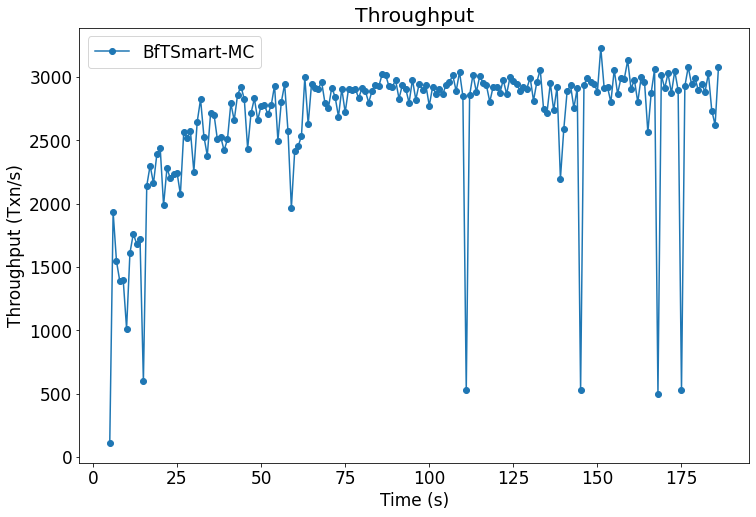

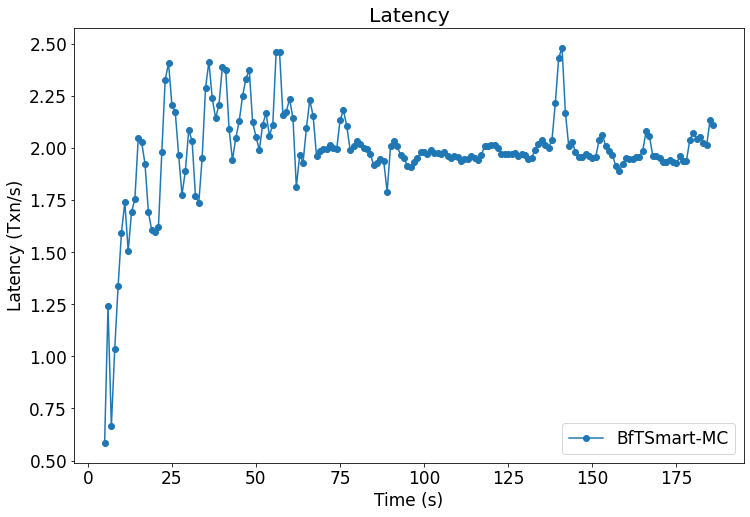

In [59]:
PIK = '../Experiments/'+experiment+"/pickle.dat"

data = [times_thputsDict, times_latsDict]

with open(PIK, "wb") as f:
    pickle.dump(data, f)


data2 = []
with open(PIK, "rb") as f:
    data2 =  pickle.load(f)


dict1 = data2[0]
dict2 = data2[1]



times1 = np.array(list(dict1.keys()))
thputs = np.array(list(dict1.values()))

times2 = np.array(list(dict2.keys()))
lats = np.array(list(dict2.values()))

times1

import pylab as pl

pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


pl.title(r'Throughput')


pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
pl.show()




pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


pl.title(r'Latency')


pl.xlabel('Time (s)')
pl.ylabel('Latency (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
pl.show()

In [60]:
times1, lats

(array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
         27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
         38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
         71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
         82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
         93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
        104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
        115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
        126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
        137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
        148., 149., 150., 151., 152., 

In [61]:
lats, np.average(lats[-85:-5])

(array([ 7.0101467 , 14.88867114,  7.97937722, 12.42390082, 16.0351952 ,
        19.11828216, 20.89027267, 18.08141462, 20.30700018, 21.08535239,
        24.60521773, 24.34386832, 23.10612942, 20.33349496, 19.26984877,
        19.1952761 , 19.43981657, 23.7699827 , 27.92374574, 28.90618191,
        26.47471844, 26.06781274, 23.6241549 , 21.30844699, 22.68125185,
        25.02116326, 24.42787566, 21.2487981 , 20.85558022, 23.44848104,
        27.45220113, 28.98725466, 26.86108628, 25.7287794 , 26.50279648,
        28.6749186 , 28.52210709, 25.12058704, 23.3099899 , 24.58652669,
        25.53577558, 26.98199666, 27.98342066, 28.51555606, 25.4956975 ,
        24.65670275, 23.89212186, 25.35974758, 26.01533162, 24.71250768,
        25.35670844, 29.54022541, 29.56299239, 25.93036477, 26.08564333,
        26.84352276, 25.70679741, 21.77655825, 23.58542173, 23.16955701,
        25.15742579, 26.78356191, 25.84138678, 23.54715605, 23.83876288,
        23.95242398, 23.95167979, 24.17286303, 23.9

In [62]:
np.sum(thputs),  np.average(thputs[-85:-5])

(484043.69, 2793.8096250000003)

In [63]:
thputs

array([ 110.9 , 1934.33, 1545.95, 1385.79, 1397.82, 1013.76, 1610.8 ,
       1762.46, 1683.65, 1717.65,  598.86, 2140.64, 2300.98, 2160.61,
       2388.95, 2438.51, 1987.25, 2277.71, 2201.1 , 2232.92, 2245.65,
       2073.2 , 2563.57, 2519.68, 2569.8 , 2252.98, 2645.73, 2824.31,
       2528.81, 2379.76, 2718.84, 2703.38, 2506.81, 2526.76, 2419.77,
       2507.7 , 2791.6 , 2657.62, 2857.71, 2924.33, 2825.65, 2434.69,
       2712.83, 2830.41, 2659.79, 2774.4 , 2779.79, 2704.46, 2774.81,
       2932.24, 2497.67, 2799.73, 2942.68, 2571.83, 1965.05, 2418.87,
       2451.66, 2533.86, 2996.23, 2625.74, 2946.85, 2912.21, 2908.64,
       2960.36, 2792.62, 2753.52, 2915.62, 2843.43, 2687.76, 2906.29,
       2719.8 , 2908.24, 2896.8 , 2907.36, 2833.7 , 2909.32, 2888.75,
       2797.26, 2891.83, 2938.26, 2925.34, 3022.61, 3018.39, 2927.65,
       2923.4 , 2973.68, 2829.33, 2934.8 , 2906.6 , 2795.59, 2978.55,
       2820.59, 2946.61, 2900.56, 2935.55, 2772.92, 2920.19, 2865.78,
       2905.37, 2863

In [64]:
  np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

(2865.9310000000005, 2.0437607895000003, 2779.4976666666666, 23.68617726233333)

In [65]:
# np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

In [66]:
np.sum((thputs[:180]))

478341.74

In [67]:
np.sum((thputs[:180]))

478341.74

In [68]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'RemoveViewChangeBftSmartMC'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(125)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1


# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Remote View Change for BftSmart-MC with timeout = 20 s')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [69]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'NonLeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [3])
# time.sleep(45)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [70]:
# experiment = 'NonLeaderFailure'

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')
# pl.axvline(x=85.48, ls='--', color = 'red')

# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [71]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'LeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [0])
# time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [72]:

# def join_node1(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.233 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node2(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.19.58 11090 11091 config0 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)
        
        
# def join_node3(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 10 172.31.29.208 11100 11101 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node4(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 11 172.31.25.228 11110 11111 1 config1 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)           

# # join_node1(11), join_node2(11)

# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)
# # print(results)  

# # time.sleep(45)
# # join_node1(11)
# # time.sleep(45)

# # join_node1(11)
# # time.sleep(45)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)



# # join_node1(11)
# # time.sleep(85)


# # join_node2(11)
# # time.sleep(85)




# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(25)



# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(20)


# # def join_node1_check(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.46 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
# #         print(command)   
        

# # join_node1_check(11)


# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(5)


# # join_node2(11)
# # time.sleep(45)


# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)




# # join_node2(11)
# # time.sleep(45)




# # join_node3(13)
# # time.sleep(40)
# # join_node4(13)
# # time.sleep(40)

# # time.sleep(50)
# check_node(10)

# # time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# ## Byzantine Remote View Change

# times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_c4_11.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with Byzantine Remote View Change ($nz$=8)')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


# ## Join End for Checking

# times_all_clients = []
# ops_all_clients = []
# thputs_all_clients = []
# latencies_all_clients = []


# for ip in clientIps:
#     print(lines.index(ip), nreplicas)
    
    
#     with open('../Experiments/'+experiment+'/'+'nohup_c'+str(nreplicas)+'_'+str(lines.index(ip))+'.out') as f:
#         data = f.readlines()
        
    
    

#     times = []
#     ops = []
#     thputs = []
#     latencies = []



#     for line in data:
#         if 'current ops/sec' in line:
#     #         print(line)

#             numbers_string = line.replace('sec:', ':').replace('operations;', ':').replace(\
#                     'current ops/sec; [UPDATE AverageLatency(us)=', ':').replace('] \n', '').replace(' ','')

        
#             if len(numbers_string.split(':')) == 4:

#                 times.append(float(numbers_string.split(':')[0]))
#                 ops.append(float(numbers_string.split(':')[1]))    
#                 thputs.append(float(numbers_string.split(':')[2]))    
#                 latencies.append(float(numbers_string.split(':')[3])/1e6)    



#     times = np.array(times)
#     ops = np.array(ops)
#     thputs = np.array(thputs)
#     latencies = np.array(latencies)
    
#     times_all_clients.append(times)
#     ops_all_clients.append(ops)    
#     thputs_all_clients.append(thputs)    
#     latencies_all_clients.append(latencies)    

# times_all_clients


# times_all_clients_final = []
# ops_all_clients_final = []
# thputs_all_clients_final = []
# latencies_all_clients_final = []

# for iter_, item in enumerate(times_all_clients):
    

#     np.array(list(set(item).intersection(*times_all_clients[:])))
#     # index = in1d(times_all_clients[0],a1)
#     # result = a2[index]

#     both = set(item).intersection(np.array(list(set(item).intersection(*times_all_clients[:]))))

#     indices_A = [list(item).index(x) for x in list(both)]
#     indices_B = [list(set(item).intersection(*times_all_clients[:])).index(x) for x in both]

#     times_all_clients_final.append(item[indices_A])
#     ops_all_clients_final.append(ops_all_clients[iter_][indices_A])
#     thputs_all_clients_final.append(thputs_all_clients[iter_][indices_A])    
#     latencies_all_clients_final.append(latencies_all_clients[iter_][indices_A])    

# times_all = times_all_clients_final[0]
# ops_all = sum(ops_all_clients_final)
# thputs_all = sum(thputs_all_clients_final)
# latencies_all = sum(latencies_all_clients_final)/len(latencies_all_clients_final)


# print('Average Throughput is ',(ops_all[-1] - ops_all[59])/(times_all[-1] - times_all[59]))

# print('Average Latency is', np.average(latencies_all[60:-10]))

# times_all, thputs_all

# # 40 client threads 2 delivery:93+95/81
# # 100 client threads 2 delivery:124+129/81
# # 100 client threads 8 delivery:138+138/81
# # 40 client threads 8 delivery:95+95/81
# # 40 client threads 16 delivery:97+96/81
# # 40 client threads 16 delivery without IO:93+93/81
# # 100 client threads 16 delivery without IO:146+149/81




# (146+149)/81

# check_node(0)

# for i in [0,1, 4, 14, 15]:
# # for i in [1]:
    
#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup_c4_'+str(i)+'.out'


#         os.system(command)

# ## Join Experiment

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))



# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))



# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 



# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  



# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # print(results)  


# # time.sleep(80)
# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # for i in [0,1,4,8,12,13,14]:
# # # for i in [1]:
    
# #     ip = lines[i]
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup'+str(i)+'.out'


# #         os.system(command)

# check_node(11)

# portStart = 11000 + len(nodeIps)*10

# join_lines = []
# currentPort = portStart

# for i in range(len(no_cluster_yet_nodes)):
#     line = str(len(nodeIps)+i) + ' ' + no_cluster_yet_nodes[i] + ' ' + str(currentPort) + ' '+ str(currentPort+1)
#     currentPort = currentPort + 10
#     join_lines.append(line)
#     print('server',line)

# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.31.236 11080 11081 config0
# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.23.57 11090 11091 config1

# ## KILL ALL JAVA



# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ## JOIN COMMAND





# def run_join_client(i):
    
    
    
#     ip = lines[-2]
#     if ip!='None':
#         current = (ip.split('.'))
        
#         join_commands = join_command(i)
        
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmarto; '+join_commands+'"'
        
#         print(command)
#         os.system(command)

# ## JOIN EXPERIMENT

# check_node(3)

# # t1 = time.time()
# # time.sleep(3)
# # t2 = time.time()

# import time
# JoinTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(40)

# for i in range(4,8):
#     print(i)
#     JoinTimes.append(time.time() - t_start)
#     run_join_client(i)
#     time.sleep(40)
    

# check_node(7)


# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ip

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out data/MultipleJoins/nohup.out'


#     os.system(command)




# import numpy as np
# import pylab as pl

# times ,thputs, lats = getTimesThputs('data/MultipleJoins/nohup.out')

# JoinTimes

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10], '-o', label='Existing nodes')


# pl.title(r'Throughput with multiple join requests for Bft-Smart ($nz$=4)')

# pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()



# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# # pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10]*lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency*thput with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# ## Random Failure

# os.system('git add .; git commit -m "Fixed Failures and Joins";git push')

# experiment = 'bjoin'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# def fail_node(i):
#     ip = lines[i]
#     if ip!='None' and ip in nodeIps:
#         current = (ip.split('.'))
                
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmartt; sudo killall java"'
        
#         print(command)
#         os.system(command)

# import numpy as np
# import random

# import time
# # time.sleep(10)

# FailTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(45)

# for i in random.sample(list(np.arange(1)), 1):
#     print(i)
#     FailTimes.append(time.time() - t_start)
#     fail_node(0)
#     time.sleep(85)
    

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/nohup.out'

#     print(command)
#     os.system(command)

# FailTimes

# times ,thputs, lats = getTimesThputs('../Experiments/nohup.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with single leader failure ($nz$=8)')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/fig6_leader.png', dpi = 150)
# pl.show()
# pl.clf()


# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))